<a href="https://colab.research.google.com/github/GeorgeM2000/Life-Expectancy-Analysis/blob/main/Life_Expectancy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [83]:
install.packages("readxl")
install.packages("ggplot2")
install.packages("readr")
install.packages("writexl")
install.packages("psych")
install.packages("dplyr")
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’




In [2]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’, ‘plyr’




In [3]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’




# Dataset and Data Exploration

In [84]:
library(readxl)
library(ggplot2)
library(dplyr)
library(readr)
library(writexl)
library(psych)
library(car)

Loading required package: mvtnorm

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




In [5]:
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [6]:
library(caret)

Loading required package: lattice



In [94]:
le <- read_excel('Life Expectancy Data.xlsx')

In [96]:
# Calculate the mean life expectancy for each country
le_means <- le %>%
  group_by(Country) %>%
  summarise(Mean_Life_Expectancy = mean(`Life Expectancy`, na.rm = TRUE))

# Get the first occurrence of each country
le_first_occurrence <- le %>%
  group_by(Country) %>%
  slice(1) %>%
  ungroup()

# Join the mean life expectancy to the first occurrences
le <- left_join(le_first_occurrence, le_means, by = "Country")

# Replace original life expectancy with the mean
le$`Life Expectancy` <- le$Mean_Life_Expectancy

In [97]:
head(le)

Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,⋯,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income Composition of Resources,Schooling,Mean_Life_Expectancy
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,58.19375,263,62,0.01,71.27962,65,1154,⋯,8.16,65,0.1,584.2592,33736494,17.2,17.3,0.479,10.1,58.19375
Albania,2015,Developing,75.15625,74,0,4.60,364.97523,99,0,⋯,6.00,99,0.1,3954.2278,28873,1.2,1.3,0.762,14.2,75.15625
Algeria,2015,Developing,73.61875,19,21,NA,0.00000,95,63,⋯,NA,95,0.1,4132.7629,39871528,6.0,5.8,0.743,14.4,73.61875
Angola,2015,Developing,49.01875,335,66,NA,0.00000,64,118,⋯,NA,64,1.9,3695.7937,2785935,8.3,8.2,0.531,11.4,49.01875
Antigua and Barbuda,2015,Developing,75.05625,13,0,NA,0.00000,99,0,⋯,NA,99,0.2,13566.9541,NA,3.3,3.3,0.784,13.9,75.05625
Argentina,2015,Developing,75.15625,116,8,NA,0.00000,94,0,⋯,NA,94,0.1,13467.1236,43417765,1.0,0.9,0.826,17.3,75.15625


In [98]:
# Display the structure of the dataset
str(le)

tibble [193 × 23] (S3: tbl_df/tbl/data.frame)
 $ Country                        : chr [1:193] "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ Year                           : num [1:193] 2015 2015 2015 2015 2015 ...
 $ Status                         : chr [1:193] "Developing" "Developing" "Developing" "Developing" ...
 $ Life Expectancy                : num [1:193] 58.2 75.2 73.6 49 75.1 ...
 $ Adult Mortality                : num [1:193] 263 74 19 335 13 116 118 59 65 118 ...
 $ Infant Deaths                  : num [1:193] 62 0 21 66 0 8 1 1 0 5 ...
 $ Alcohol                        : num [1:193] 0.01 4.6 NA NA NA NA NA NA NA NA ...
 $ Percentage Expenditure         : num [1:193] 71.3 365 0 0 0 ...
 $ Hepatitis B                    : num [1:193] 65 99 95 64 99 94 94 93 93 96 ...
 $ Measles                        : num [1:193] 1154 0 63 118 0 ...
 $ BMI                            : num [1:193] 19.1 58 59.5 23.3 47.7 62.8 54.9 66.6 57.6 52.5 ...
 $ Under-five Deaths              : num

In [99]:
print(length(unique(le$Alcohol)))
print(length(unique(le$`Percentage Expenditure`)))
print(length(unique(le$`HIV/AIDS`)))
print(length(unique(le$`Thinness  1-19 years`)))
print(length(unique(le$`Thinness 5-9 years`)))
print(length(unique(le$`Income Composition of Resources`)))

[1] 8
[1] 8
[1] 33
[1] 79
[1] 87
[1] 151


In [100]:
# Summary of the dataset
summary(le)

   Country               Year         Status          Life Expectancy
 Length:193         Min.   :2013   Length:193         Min.   :46.11  
 Class :character   1st Qu.:2015   Class :character   1st Qu.:62.48  
 Mode  :character   Median :2015   Mode  :character   Median :72.49  
                    Mean   :2015                      Mean   :69.22  
                    3rd Qu.:2015                      3rd Qu.:75.11  
                    Max.   :2015                      Max.   :82.54  
                                                      NA's   :10     
 Adult Mortality Infant Deaths       Alcohol       Percentage Expenditure
 Min.   :  1.0   Min.   :  0.00   Min.   : 0.010   Min.   :  0.00        
 1st Qu.: 74.0   1st Qu.:  0.00   1st Qu.: 0.010   1st Qu.:  0.00        
 Median :138.0   Median :  2.00   Median : 0.010   Median :  0.00        
 Mean   :152.9   Mean   : 22.57   Mean   : 2.690   Mean   :  9.11        
 3rd Qu.:213.0   3rd Qu.: 15.00   3rd Qu.: 5.285   3rd Qu.:  0.00     

In [101]:
# Display the number of missing values for each feature
print(colSums(is.na(le)))

                        Country                            Year 
                              0                               0 
                         Status                 Life Expectancy 
                              0                              10 
                Adult Mortality                   Infant Deaths 
                             10                               0 
                        Alcohol          Percentage Expenditure 
                            178                               0 
                    Hepatitis B                         Measles 
                              9                               0 
                            BMI               Under-five Deaths 
                              4                               0 
                          Polio               Total Expenditure 
                              0                             181 
                     Diphtheria                        HIV/AIDS 
                         

In [102]:
le$Schooling <- cut(le$Schooling,
                    breaks= c(-Inf, 8, 12, Inf),
                    labels = c("Low", "Medium", "High"))

In [103]:
le$Status <- factor(le$Status)
# 1 for Developed and 2 for Developing Countries

In [104]:
str(le)

tibble [193 × 23] (S3: tbl_df/tbl/data.frame)
 $ Country                        : chr [1:193] "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ Year                           : num [1:193] 2015 2015 2015 2015 2015 ...
 $ Status                         : Factor w/ 2 levels "Developed","Developing": 2 2 2 2 2 2 2 1 1 2 ...
 $ Life Expectancy                : num [1:193] 58.2 75.2 73.6 49 75.1 ...
 $ Adult Mortality                : num [1:193] 263 74 19 335 13 116 118 59 65 118 ...
 $ Infant Deaths                  : num [1:193] 62 0 21 66 0 8 1 1 0 5 ...
 $ Alcohol                        : num [1:193] 0.01 4.6 NA NA NA NA NA NA NA NA ...
 $ Percentage Expenditure         : num [1:193] 71.3 365 0 0 0 ...
 $ Hepatitis B                    : num [1:193] 65 99 95 64 99 94 94 93 93 96 ...
 $ Measles                        : num [1:193] 1154 0 63 118 0 ...
 $ BMI                            : num [1:193] 19.1 58 59.5 23.3 47.7 62.8 54.9 66.6 57.6 52.5 ...
 $ Under-five Deaths              : nu

In [105]:
names(le)[names(le) == "Thinness  1-19 years"] <- "ThinnessAyears"
names(le)[names(le) == "Thinness 5-9 years"] <- "ThinnessByears"

## Categorical Feature Exploration

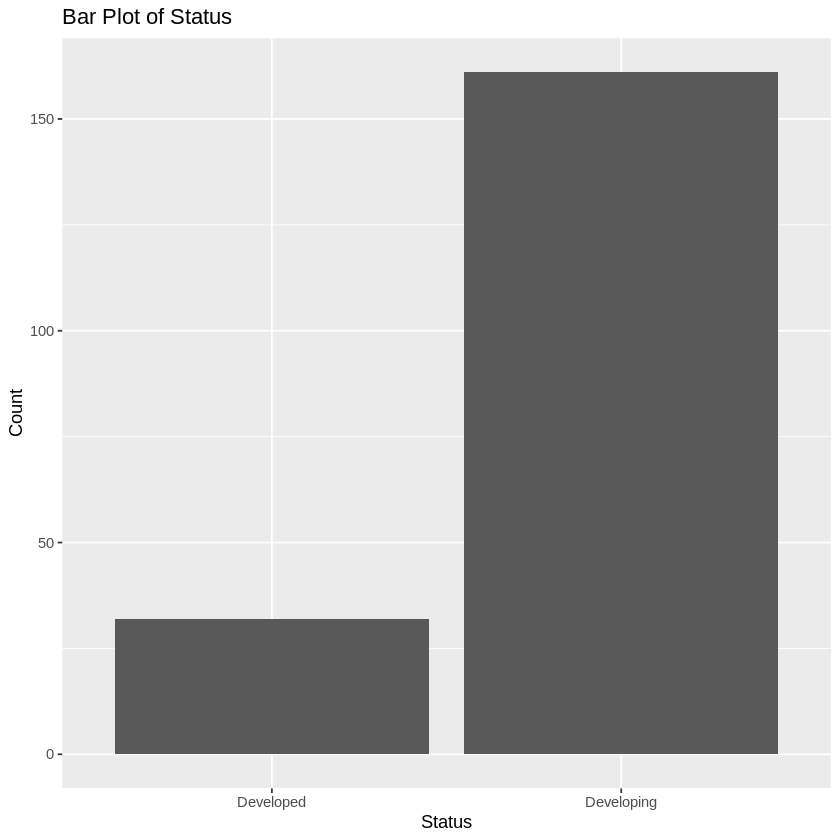

In [106]:
# Bar plot for Status
ggplot(le, aes(x = Status)) +
  geom_bar() +
  labs(title = "Bar Plot of Status", x = "Status", y = "Count")

In [107]:
print(table(le$Status))


 Developed Developing 
        32        161 


In [108]:
print(prop.table(table(le$Status)))


 Developed Developing 
 0.1658031  0.8341969 


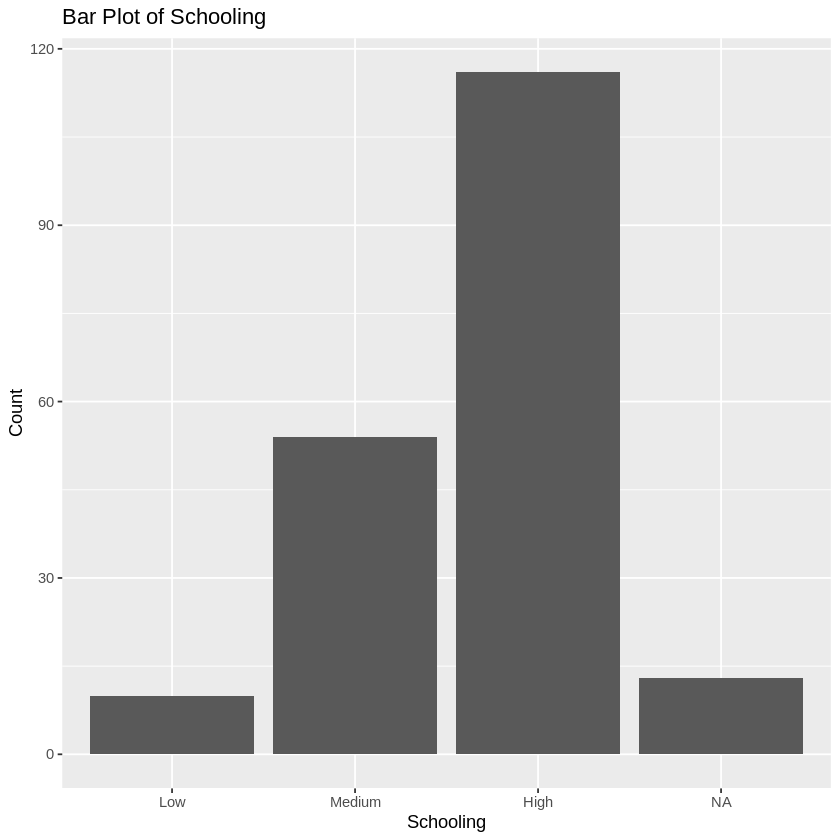

In [109]:
# Bar plot for Status
ggplot(le, aes(x = Schooling)) +
  geom_bar() +
  labs(title = "Bar Plot of Schooling", x = "Schooling", y = "Count")

In [110]:
print(table(le$Schooling))


   Low Medium   High 
    10     54    116 


In [111]:
print(prop.table(table(le$Schooling)))


       Low     Medium       High 
0.05555556 0.30000000 0.64444444 


In [112]:
print(le %>%
  filter(Status %in% c('Developed', 'Developing')) %>%
  group_by(Status, Schooling) %>%
  summarise(count = n()))

`summarise()` has grouped output by 'Status'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
# Groups:   Status [2]
  Status     Schooling count
  <fct>      <fct>     <int>
1 Developed  High         29
2 Developed  NA            3
3 Developing Low          10
4 Developing Medium       54
5 Developing High         87
6 Developing NA           10


## Continuous Features Exploration

Warning message:
“Removed 69 rows containing non-finite values (`stat_bin()`).”


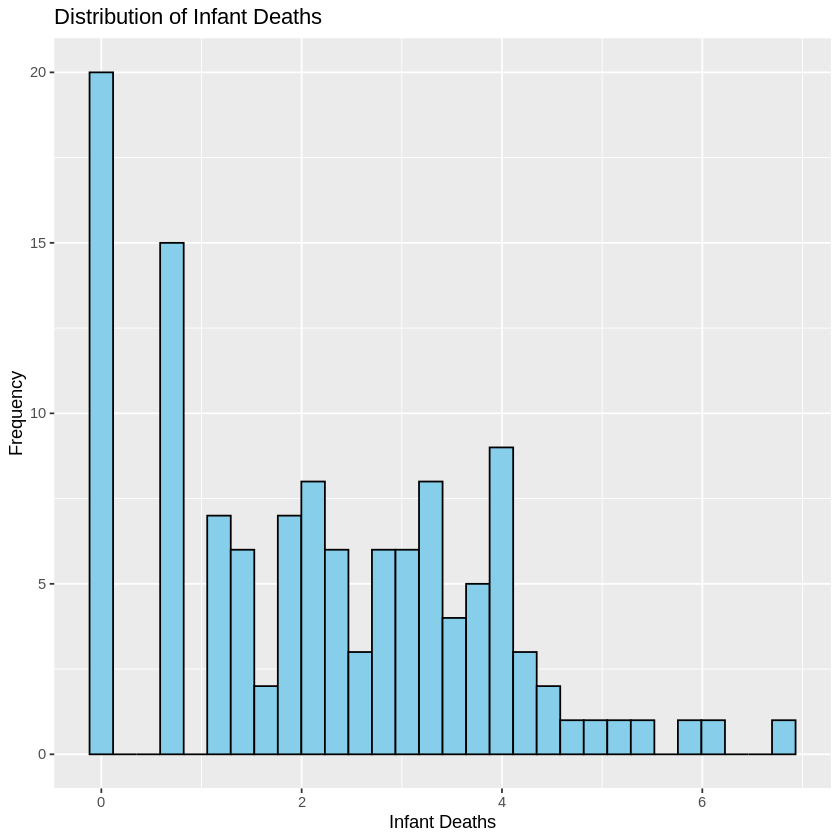

In [113]:
ggplot(le, aes(x = log(`Infant Deaths`))) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Infant Deaths", x = "Infant Deaths", y = "Frequency")

In [114]:
describe(na.omit(le$`Infant Deaths`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,193,22.56995,81.64689,2,7.825806,2.9652,0,910,910,8.058041,76.24449,5.877072


Warning message:
“Removed 9 rows containing non-finite values (`stat_bin()`).”


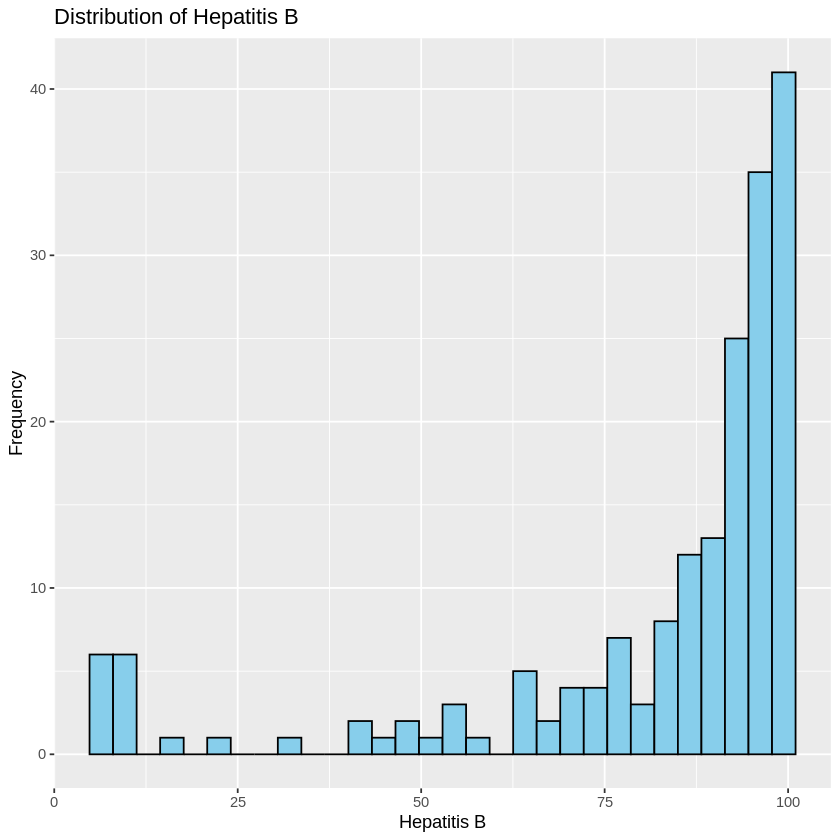

In [115]:
ggplot(le, aes(x = `Hepatitis B`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Hepatitis B", x = "Hepatitis B", y = "Frequency")

Warning message:
“Removed 72 rows containing non-finite values (`stat_bin()`).”


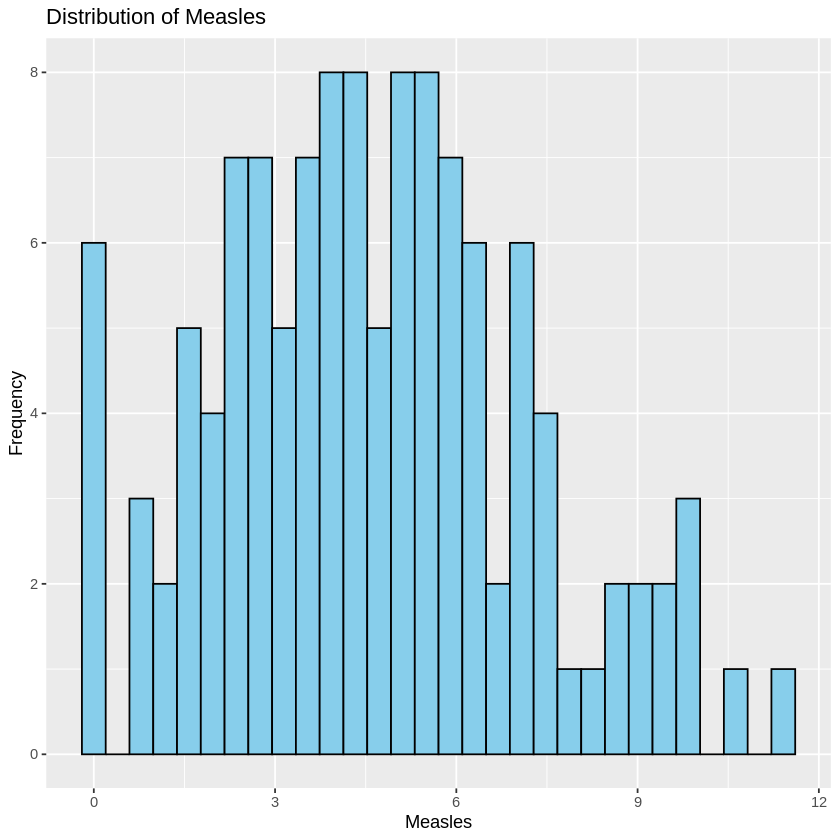

In [116]:
ggplot(le, aes(x = log(Measles))) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Measles", x = "Measles", y = "Frequency")

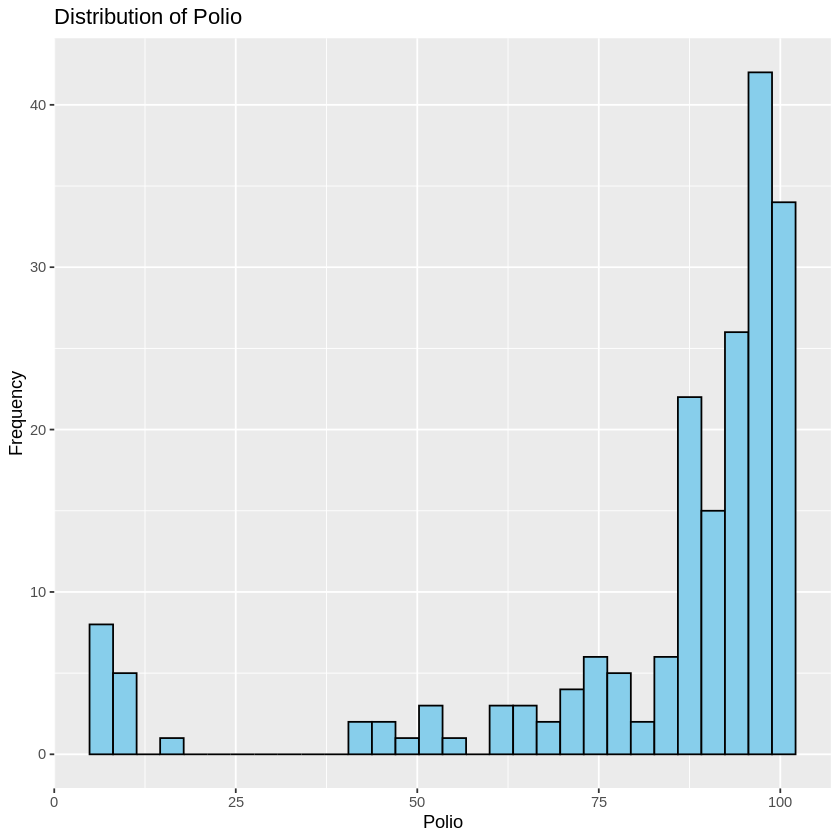

In [117]:
ggplot(le, aes(x = Polio)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Polio", x = "Polio", y = "Frequency")

In [118]:
describe(na.omit(le$Polio))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,193,83.20207,24.36967,93,89.23226,8.8956,5,99,94,-2.150277,3.713062,1.754167


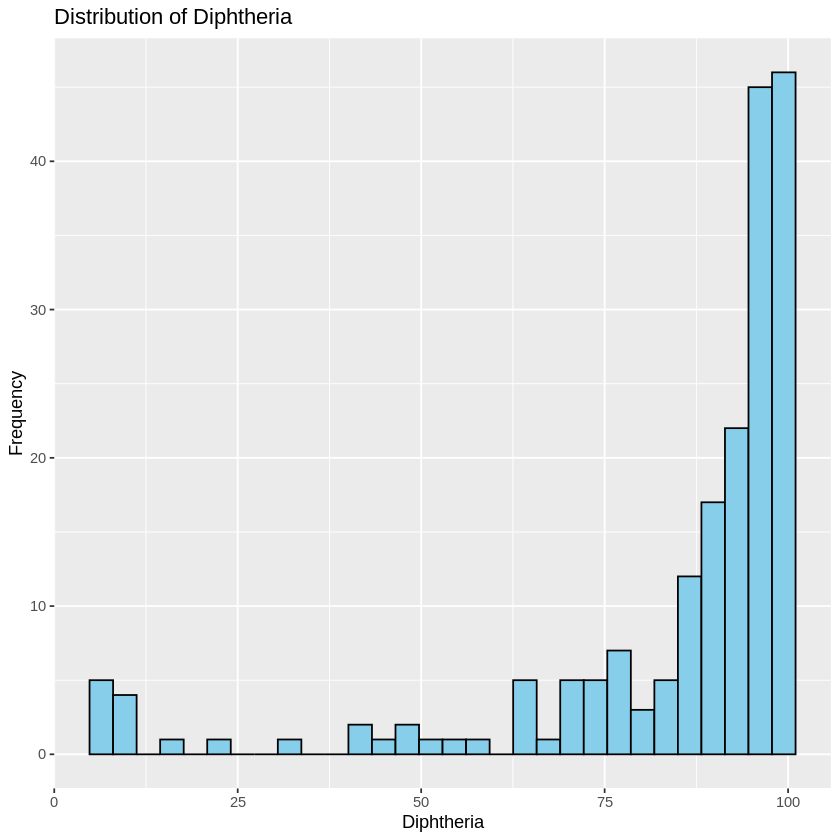

In [119]:
ggplot(le, aes(x = Diphtheria)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Diphtheria", x = "Diphtheria", y = "Frequency")

In [120]:
describe(na.omit(le$Diphtheria))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,193,84.5544,22.41345,94,90.09677,7.413,6,99,93,-2.302042,4.666657,1.613356


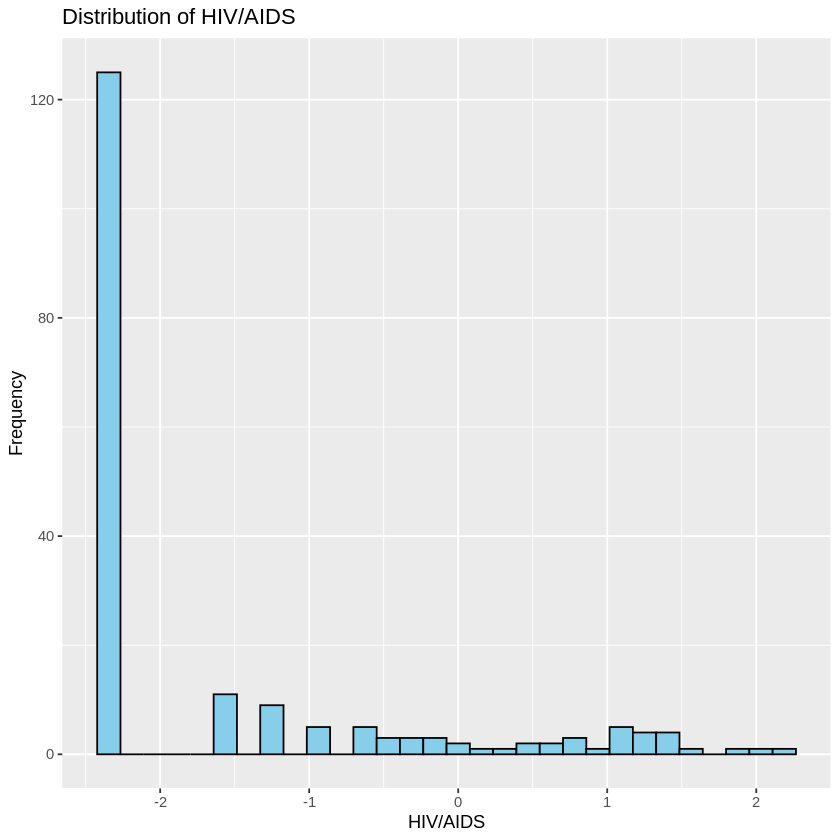

In [121]:
ggplot(le, aes(x = log(`HIV/AIDS`))) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of HIV/AIDS", x = "HIV/AIDS", y = "Frequency")

In [122]:
describe(na.omit(le$`HIV/AIDS`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,193,0.6316062,1.315131,0.1,0.2722581,0,0.1,9.3,9.2,3.441302,13.92942,0.09466518


Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”


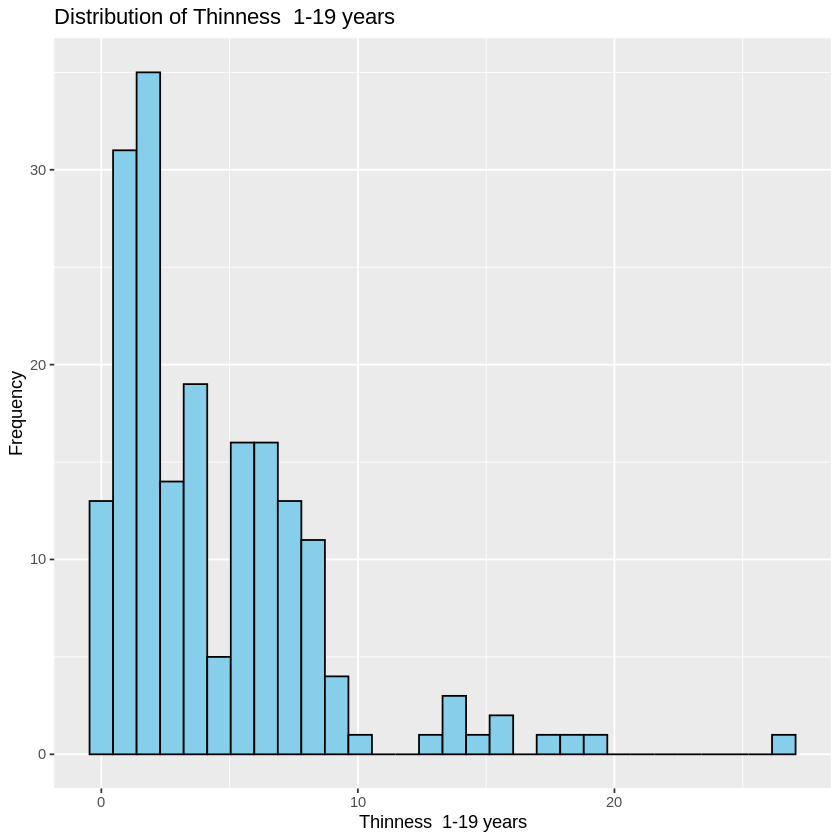

In [123]:
ggplot(le, aes(x = ThinnessAyears)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Thinness  1-19 years", x = "Thinness  1-19 years", y = "Frequency")

In [124]:
describe(na.omit(le$ThinnessAyears))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,189,4.380423,4.087889,3.3,3.769935,3.40998,0.1,26.7,26.6,1.928649,5.472899,0.2973502


Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”


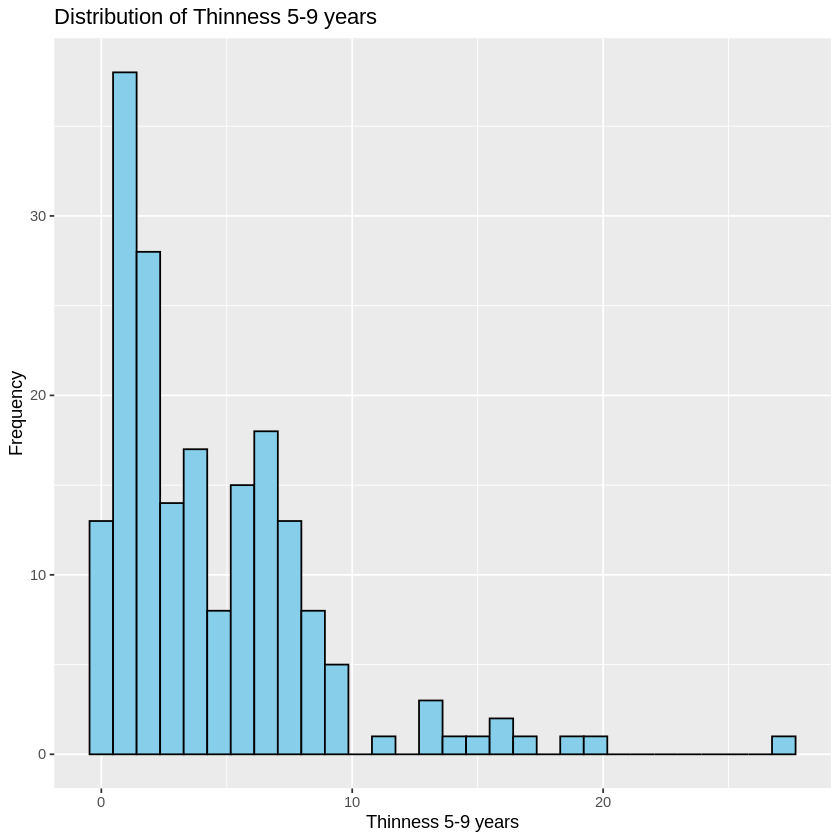

In [125]:
ggplot(le, aes(x = ThinnessByears)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Thinness 5-9 years", x = "Thinness 5-9 years", y = "Frequency")

In [126]:
describe(na.omit(le$ThinnessByears))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,189,4.417989,4.168371,3.3,3.78366,3.40998,0.1,27.3,27.2,1.943796,5.594191,0.3032043


Warning message:
“Removed 10 rows containing non-finite values (`stat_bin()`).”


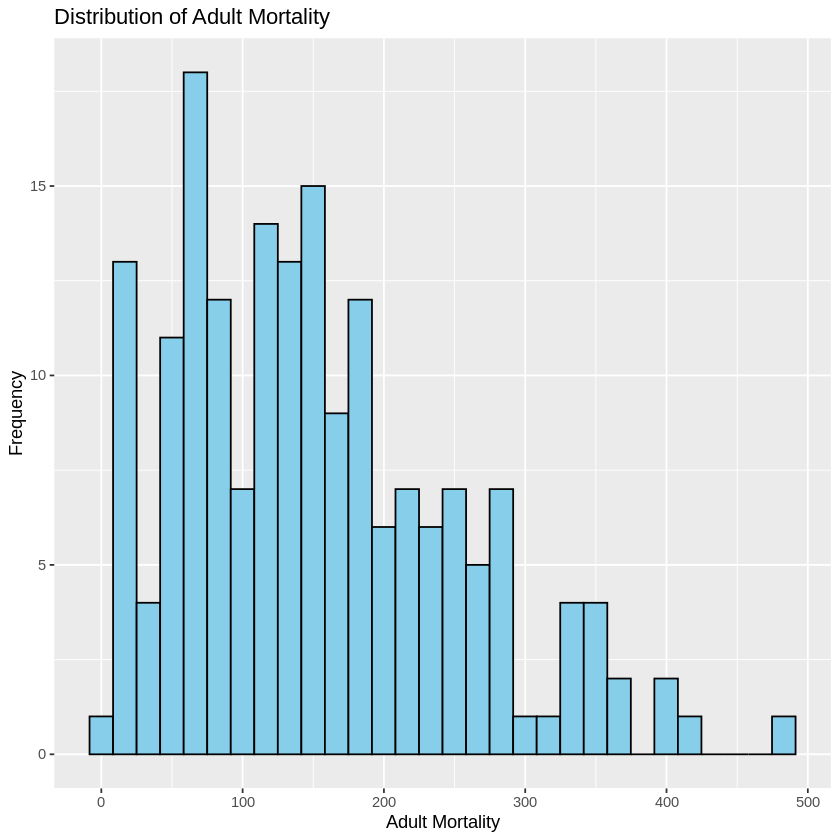

In [127]:
ggplot(le, aes(x = `Adult Mortality`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Adult Mortality", x = "Adult Mortality", y = "Frequency")

In [128]:
describe(na.omit(le$`Adult Mortality`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,183,152.8634,97.56118,138,144.7347,97.8516,1,484,483,0.7512322,0.1319458,7.21193


Warning message:
“Removed 186 rows containing non-finite values (`stat_bin()`).”


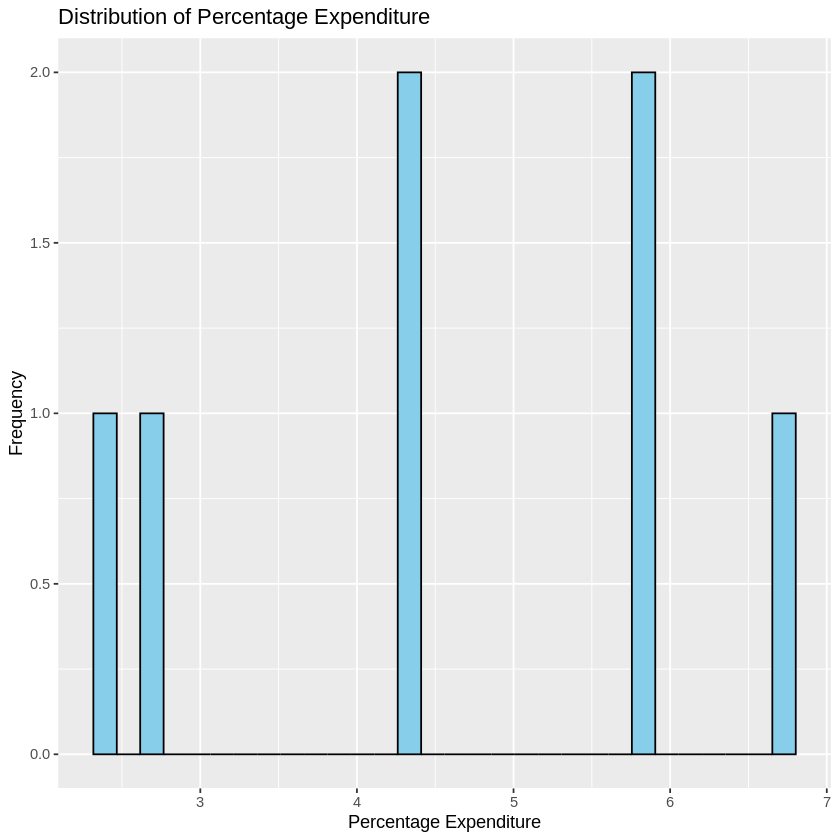

In [129]:
ggplot(le, aes(x = log(`Percentage Expenditure`))) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Percentage Expenditure", x = "Percentage Expenditure", y = "Frequency")

In [130]:
describe(na.omit(le$`Percentage Expenditure`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,193,9.109488,72.44816,0,0,0,0,871.8783,871.8783,9.885602,106.6192,5.214933


Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”


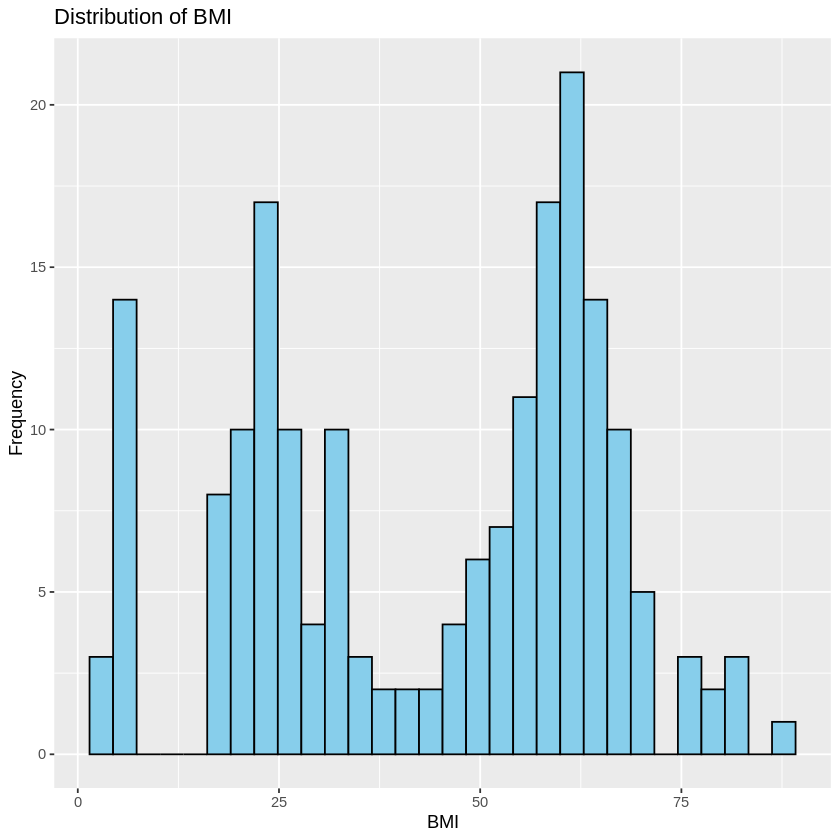

In [131]:
ggplot(le, aes(x = `BMI`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of BMI", x = "BMI", y = "Frequency")

In [132]:
describe(na.omit(le$BMI))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,189,43.88201,21.59915,51.1,44.75359,22.9803,2.5,87.3,84.8,-0.2673719,-1.162818,1.571107


Warning message:
“Removed 181 rows containing non-finite values (`stat_bin()`).”


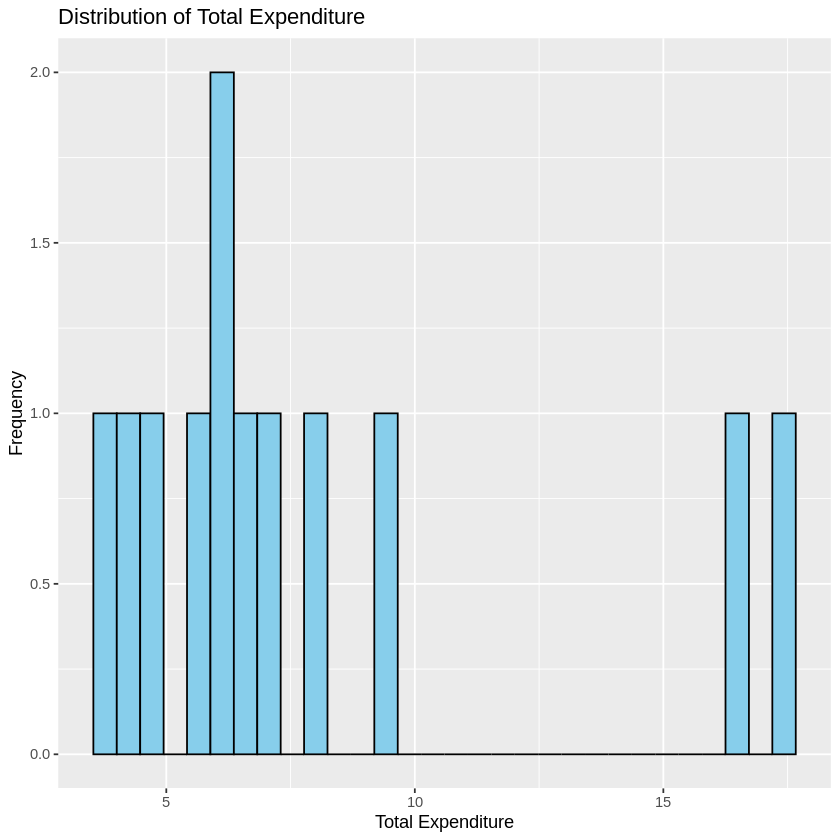

In [133]:
ggplot(le, aes(x = `Total Expenditure`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Total Expenditure", x = "Total Expenditure", y = "Frequency")

In [134]:
describe(na.omit(le$`Total Expenditure`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,12,7.935833,4.489925,6.32,7.441,2.601963,3.58,17.24,13.66,1.164471,-0.1560556,1.29613


Warning message:
“Removed 34 rows containing non-finite values (`stat_bin()`).”


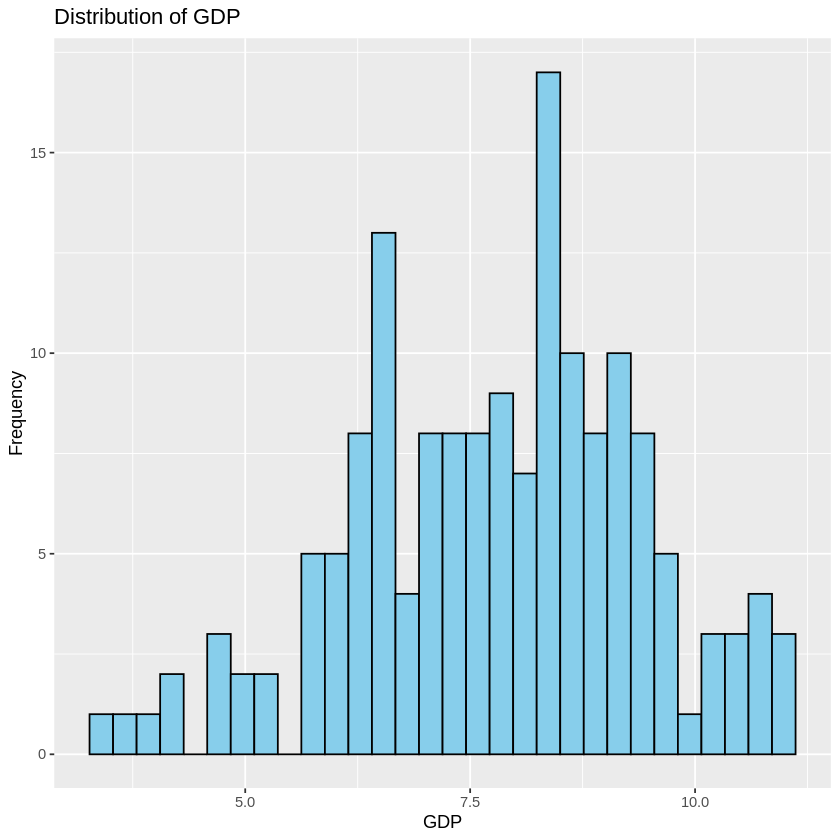

In [135]:
ggplot(le, aes(x = log(`GDP`))) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of GDP", x = "GDP", y = "Frequency")

In [136]:
describe(na.omit(log(le$GDP)))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,159,7.800725,1.595943,7.964968,7.841351,1.688507,3.516941,11.10265,7.585706,-0.2818954,-0.2131642,0.1265665


Warning message:
“Removed 49 rows containing non-finite values (`stat_bin()`).”


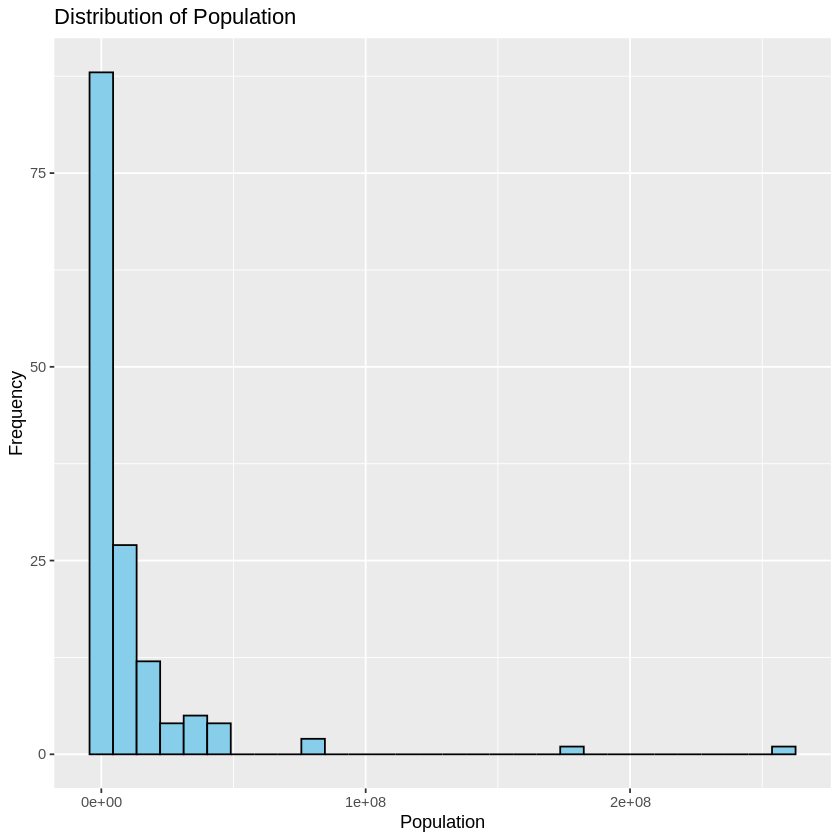

In [137]:
ggplot(le, aes(x = `Population`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Population", x = "Population", y = "Frequency")

Warning message:
“Removed 17 rows containing non-finite values (`stat_bin()`).”


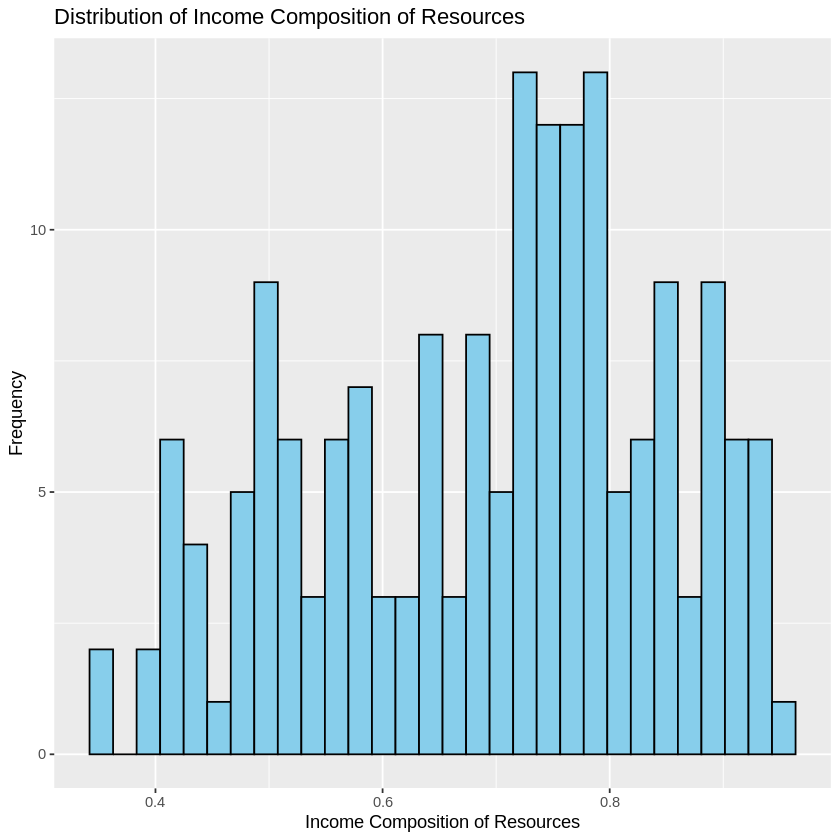

In [138]:
ggplot(le, aes(x = `Income Composition of Resources`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Income Composition of Resources", x = "Income Composition of Resources", y = "Frequency")

In [139]:
describe(na.omit(le$`Income Composition of Resources`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,176,0.6927273,0.1523085,0.7235,0.6987535,0.170499,0.347,0.948,0.601,-0.3542942,-0.8945521,0.01148069


Warning message:
“Removed 64 rows containing non-finite values (`stat_bin()`).”


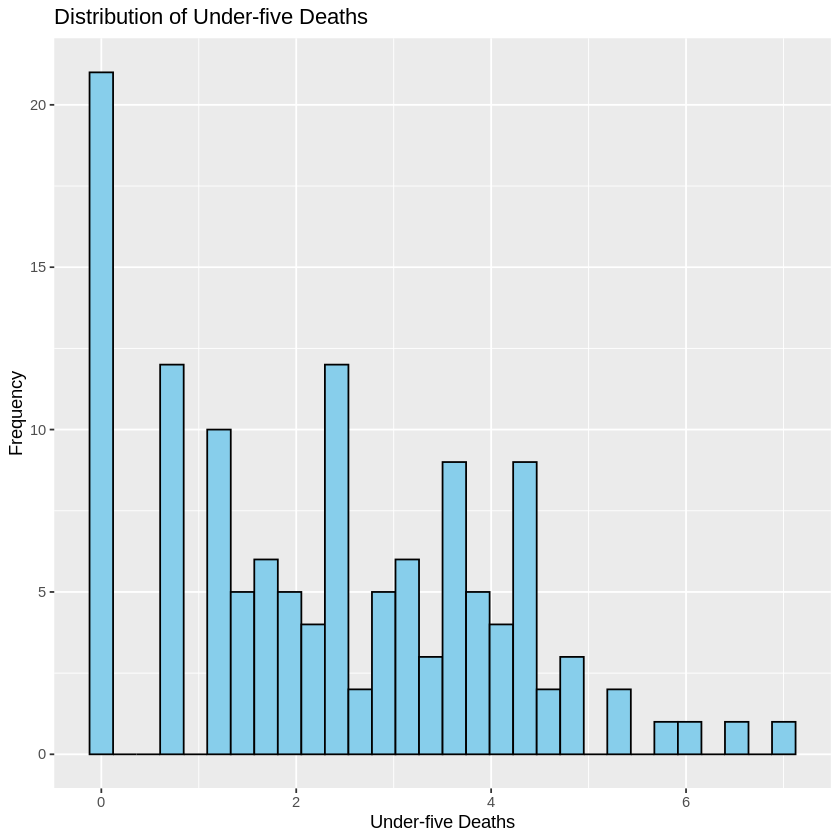

In [140]:
ggplot(le, aes(x = log(`Under-five Deaths`))) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Under-five Deaths", x = "Under-five Deaths", y = "Frequency")

In [141]:
describe(na.omit(le$`Under-five Deaths`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,193,29.97409,105.1704,2,10.35484,2.9652,0,1100,1100,7.528031,65.15679,7.570329


Warning message:
“Removed 178 rows containing non-finite values (`stat_bin()`).”


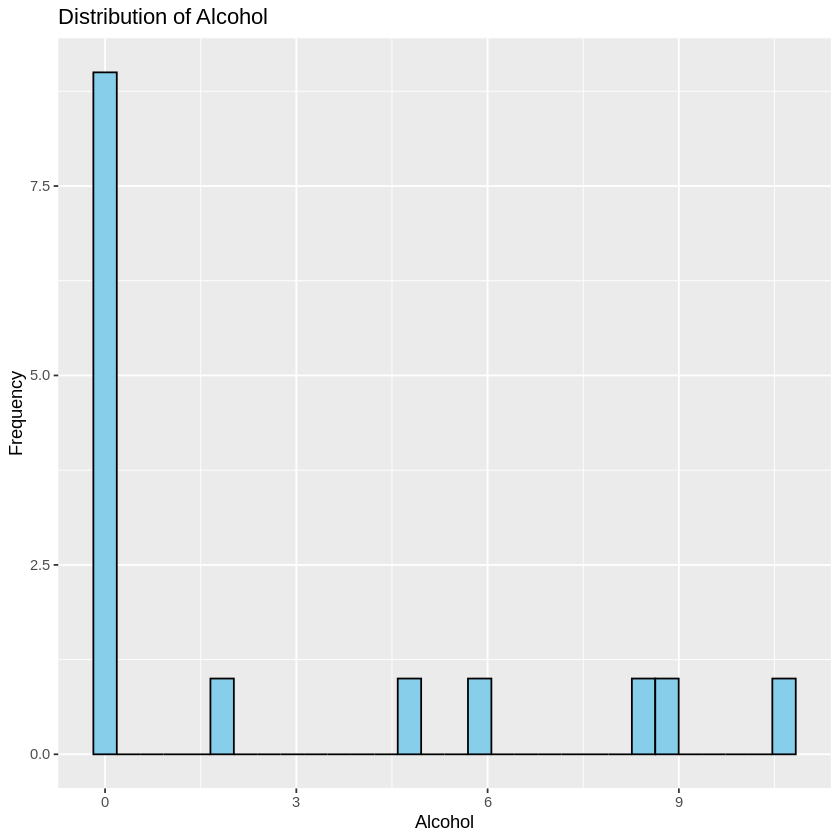

In [142]:
ggplot(le, aes(x = `Alcohol`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Alcohol", x = "Alcohol", y = "Frequency")

## Statistical Hypothesis Testing

In [143]:
describe(na.omit(le$`Life Expectancy`))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,183,69.22493,9.186432,72.4875,69.83848,8.904866,46.1125,82.5375,36.425,-0.5797149,-0.6436385,0.6790806


Warning message:
“Removed 10 rows containing non-finite values (`stat_bin()`).”


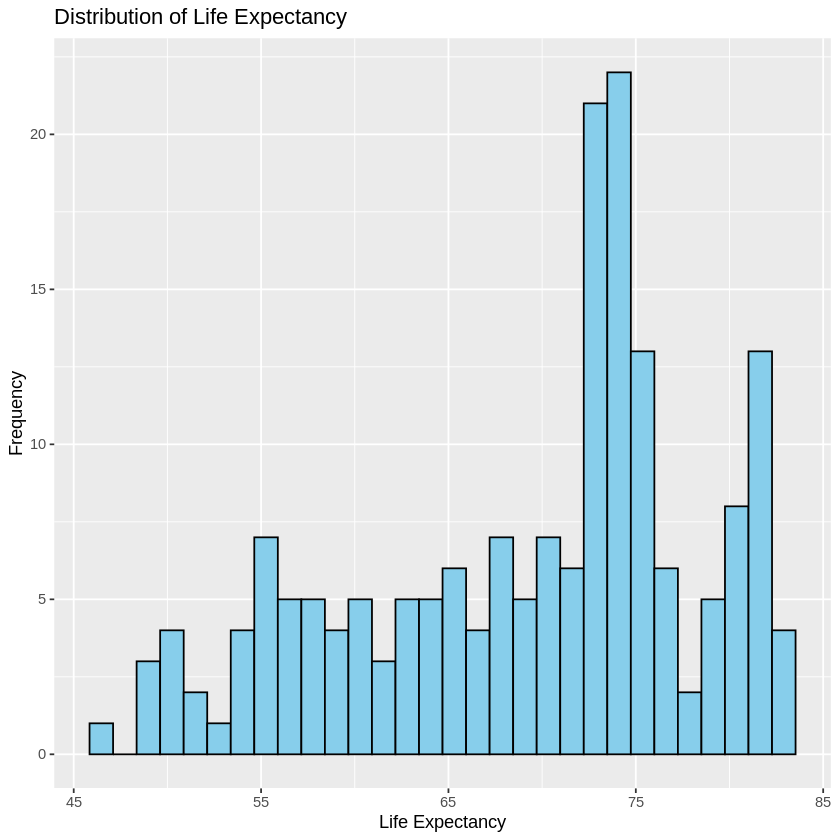

In [144]:
ggplot(le, aes(x = `Life Expectancy`)) +
  geom_histogram(bins=30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Life Expectancy", x = "Life Expectancy", y = "Frequency")

Warning message:
“Removed 10 rows containing non-finite values (`stat_qq_line()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_qq()`).”


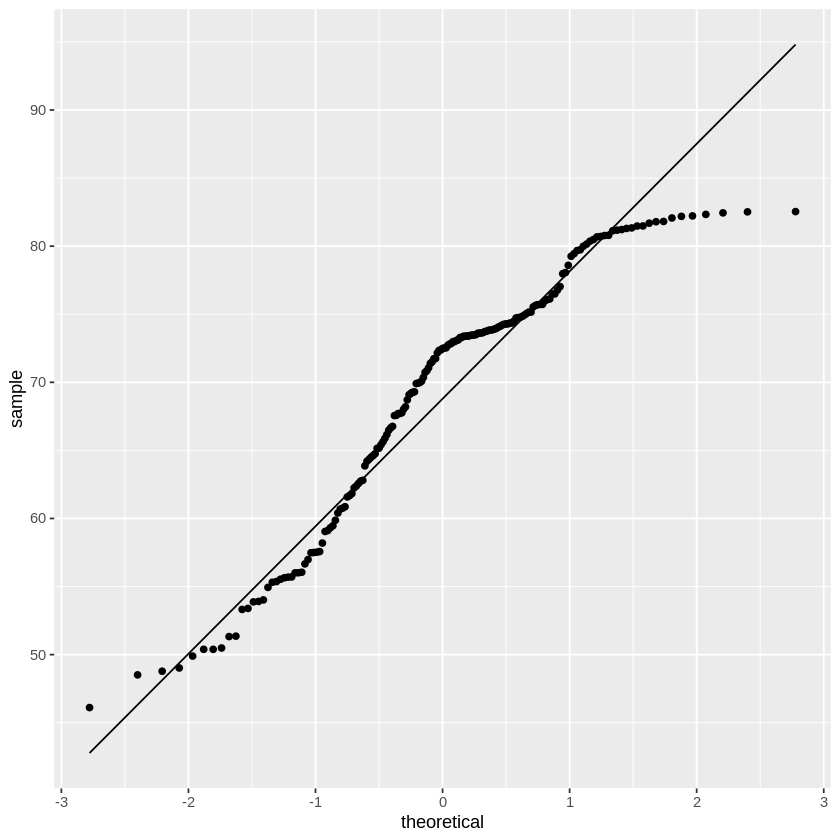

In [145]:
ggplot(le, aes(sample=`Life Expectancy`)) +
  stat_qq_line() +
  stat_qq()

In [146]:
t.test(na.omit(le$`Life Expectancy`), mu = 70)


	One Sample t-test

data:  na.omit(le$`Life Expectancy`)
t = -1.1413, df = 182, p-value = 0.2552
alternative hypothesis: true mean is not equal to 70
95 percent confidence interval:
 67.88505 70.56481
sample estimates:
mean of x 
 69.22493 


In [147]:
wilcox.test(na.omit(le$`Life Expectancy`), mu = 70)


	Wilcoxon signed rank test with continuity correction

data:  na.omit(le$`Life Expectancy`)
V = 8218.5, p-value = 0.7815
alternative hypothesis: true location is not equal to 70


In [148]:
describeBy(le$`Life Expectancy`, le$Status)


 Descriptive statistics by group 
group: Developed
   vars  n mean   sd median trimmed mad   min   max range skew kurtosis   se
X1    1 32 79.2 3.22  80.52   79.52 2.1 72.81 82.54  9.73 -0.8    -0.91 0.57
------------------------------------------------------------ 
group: Developing
   vars   n  mean   sd median trimmed  mad   min   max range  skew kurtosis  se
X1    1 151 67.11 8.63   69.3   67.67 7.71 46.11 82.22 36.11 -0.52    -0.78 0.7

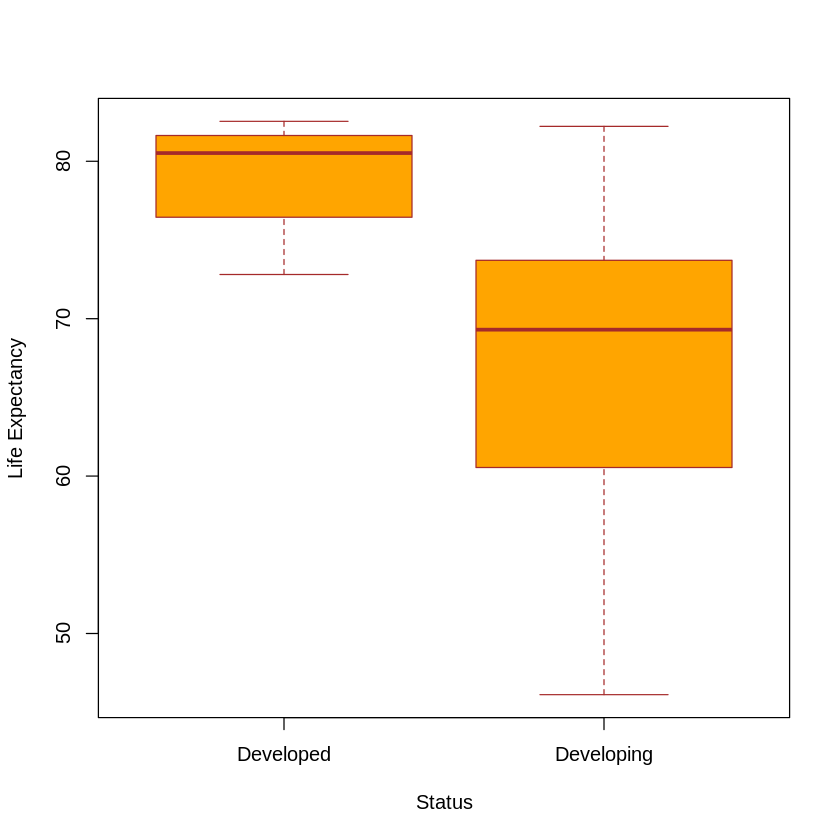

In [149]:
boxplot(`Life Expectancy`~Status,
data=le,
main="",
xlab="Status",
ylab="Life Expectancy",
col="orange",
border="brown"
)

In [150]:
fligner_test_result <- fligner.test(le$`Life Expectancy` ~ le$Status, le)
print(fligner_test_result)


	Fligner-Killeen test of homogeneity of variances

data:  le$`Life Expectancy` by le$Status
Fligner-Killeen:med chi-squared = 22.243, df = 1, p-value = 2.403e-06



In [151]:
leveneTest(`Life Expectancy` ~ Status,
            center=mean,
            data = le)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,33.25049,3.439259e-08
,181,NA,NA


In [152]:
t.test(`Life Expectancy` ~ Status,
        data=le,
        var.equal=F)


	Welch Two Sample t-test

data:  Life Expectancy by Status
t = 13.362, df = 133.27, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Developed and group Developing is not equal to 0
95 percent confidence interval:
 10.29725 13.87552
sample estimates:
 mean in group Developed mean in group Developing 
                79.19785                 67.11147 


In [153]:
mann_whitney_result <- wilcox.test(`Life Expectancy` ~ Status, data = le)
print(mann_whitney_result)


	Wilcoxon rank sum test with continuity correction

data:  Life Expectancy by Status
W = 4473, p-value = 4.181e-14
alternative hypothesis: true location shift is not equal to 0



In [154]:
levels(le$Status)

[1] "Developed"  "Developing"

In [155]:
describeBy(le$`Life Expectancy`, le$Schooling)


 Descriptive statistics by group 
group: Low
   vars n  mean   sd median trimmed  mad   min   max range  skew kurtosis   se
X1    1 8 56.08 4.95  56.31   56.08 6.54 48.51 61.83 13.31 -0.25    -1.67 1.75
------------------------------------------------------------ 
group: Medium
   vars  n  mean   sd median trimmed  mad   min   max range  skew kurtosis   se
X1    1 53 60.75 6.78  60.86   60.81 7.08 46.11 73.45 27.34 -0.08    -0.78 0.93
------------------------------------------------------------ 
group: High
   vars   n  mean   sd median trimmed  mad   min   max range  skew kurtosis
X1    1 112 74.37 5.44  74.08   74.79 2.99 53.91 82.54 28.63 -0.95     2.03
     se
X1 0.51

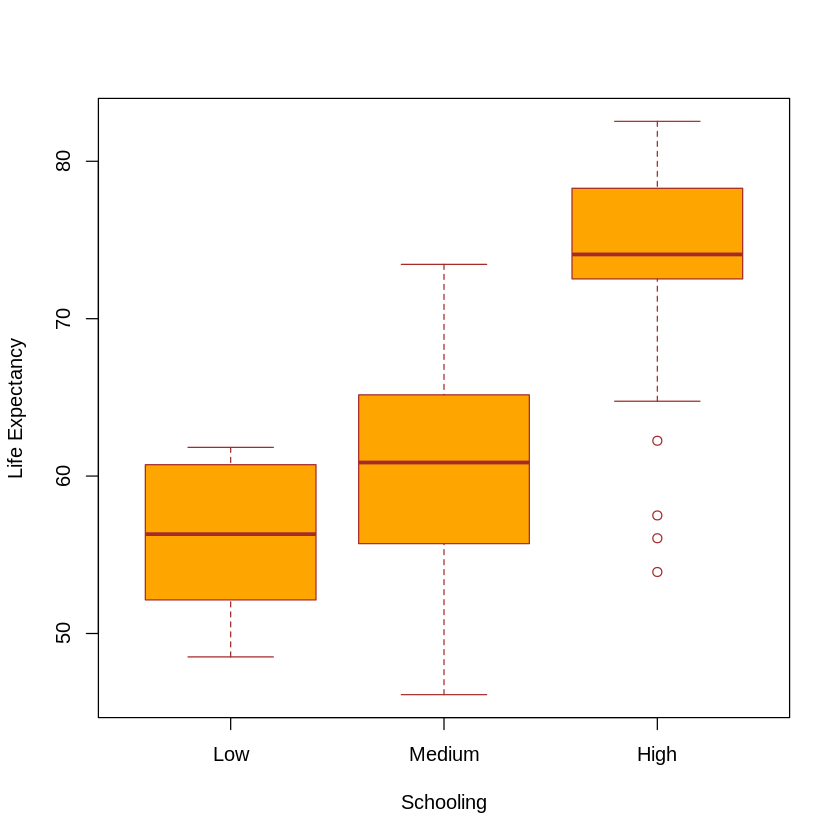

In [156]:
boxplot(`Life Expectancy`~Schooling,
data=le,
main="",
xlab="Schooling",
ylab="Life Expectancy",
col="orange",
border="brown"
)

In [157]:
ANOVA.results <- aov(`Life Expectancy` ~ Schooling, data=le)
summary(ANOVA.results)

             Df Sum Sq Mean Sq F value Pr(>F)    
Schooling     2   8150    4075   118.5 <2e-16 ***
Residuals   170   5844      34                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
20 observations deleted due to missingness

In [158]:
kruskal_test_result <- kruskal.test(`Life Expectancy` ~ Schooling, data = le)
print(kruskal_test_result)


	Kruskal-Wallis rank sum test

data:  Life Expectancy by Schooling
Kruskal-Wallis chi-squared = 97.025, df = 2, p-value < 2.2e-16



In [159]:
fligner_test_result <- fligner.test(le$`Life Expectancy` ~ le$Schooling, data = le)
print(fligner_test_result)


	Fligner-Killeen test of homogeneity of variances

data:  le$`Life Expectancy` by le$Schooling
Fligner-Killeen:med chi-squared = 9.3555, df = 2, p-value = 0.0093



In [160]:
leveneTest(`Life Expectancy` ~ Schooling,
            center=mean,
            data = le)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,3.842075,0.02333565
,170,NA,NA


In [161]:
pairwise_comparisons <- pairwise.wilcox.test(le$`Life Expectancy`, le$Schooling, p.adjust.method = "BH")
print(pairwise_comparisons)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  le$`Life Expectancy` and le$Schooling 

       Low     Medium 
Medium 0.059   -      
High   6.9e-06 < 2e-16

P value adjustment method: BH 


In [85]:
dunnett(ANOVA.results)

ERROR: Error in dunnett(ANOVA.results): could not find function "dunnett"


## Correlation Analysis

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`Adult Mortality`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`Adult Mortality` and le$`Life Expectancy`
S = 1801492, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.7637755 


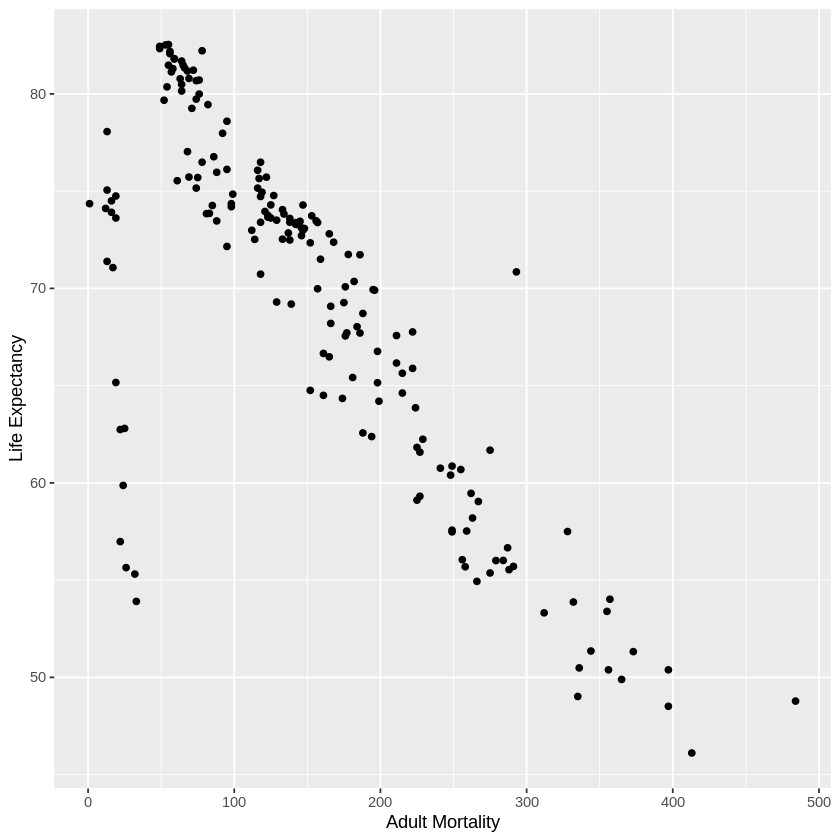

In [162]:
ggplot(le, aes(x=`Adult Mortality`, y=`Life Expectancy`)) + geom_point() + labs(x="Adult Mortality", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Adult Mortality`, method = "spearman")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`Infant Deaths`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`Infant Deaths` and le$`Life Expectancy`
S = 1652970, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6183631 


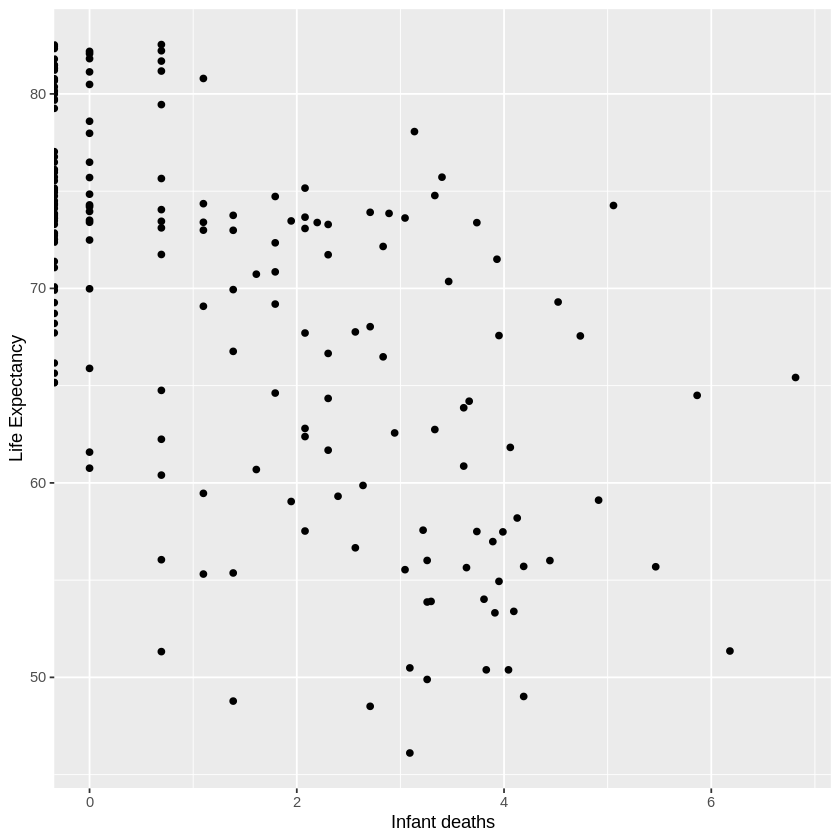

In [163]:
ggplot(le, aes(x=log(`Infant Deaths`), y=`Life Expectancy`)) + geom_point() + labs(x="Infant deaths", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Infant Deaths`, method = "spearman")

Warning message:
“Removed 187 rows containing missing values (`geom_point()`).”


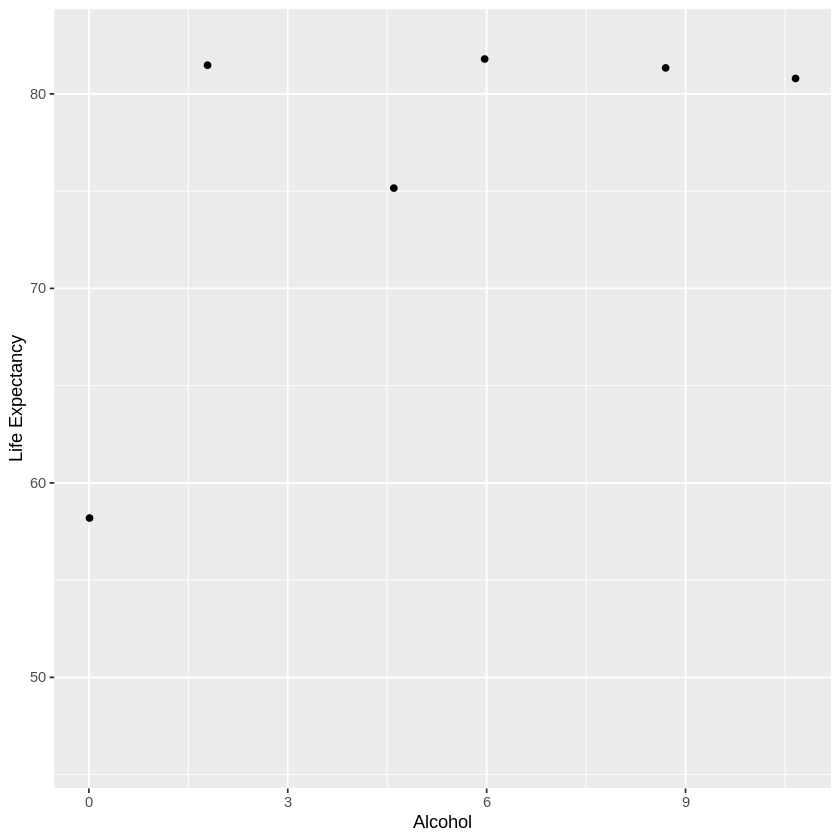

In [164]:
ggplot(le, aes(x=`Alcohol`, y=`Life Expectancy`)) + geom_point() + labs(x="Alcohol", y="Life Expectancy")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`Percentage Expenditure`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`Percentage Expenditure` and le$`Life Expectancy`
S = 1034511, p-value = 0.8629
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.01285236 


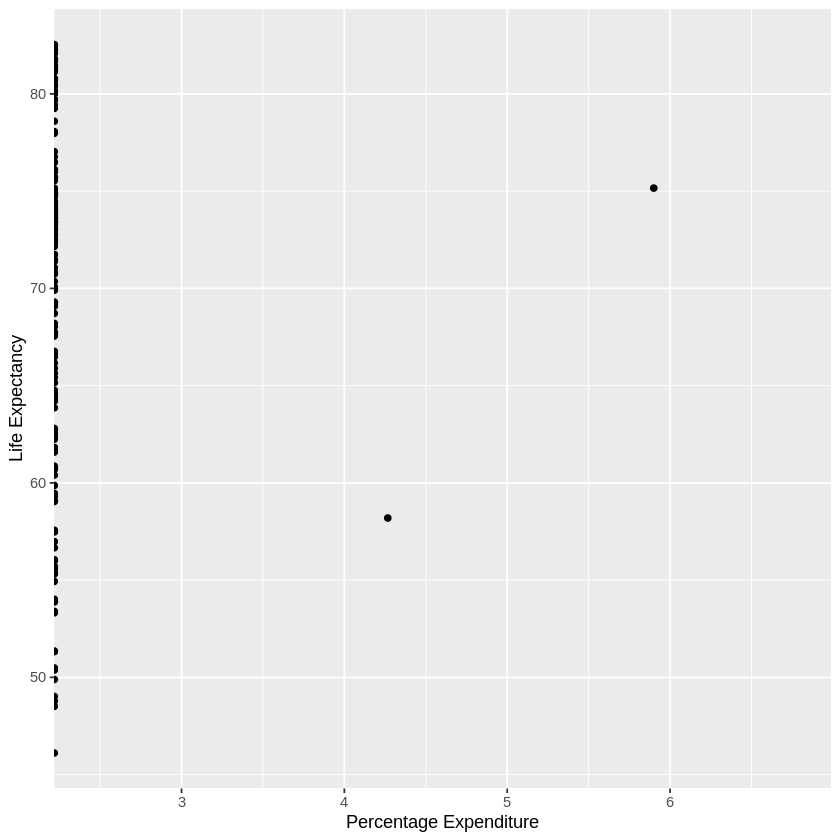

In [165]:
ggplot(le, aes(x=log(`Percentage Expenditure`), y=`Life Expectancy`)) + geom_point() + labs(x="Percentage Expenditure", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Percentage Expenditure`, method = "spearman")

Warning message:
“Removed 19 rows containing missing values (`geom_point()`).”


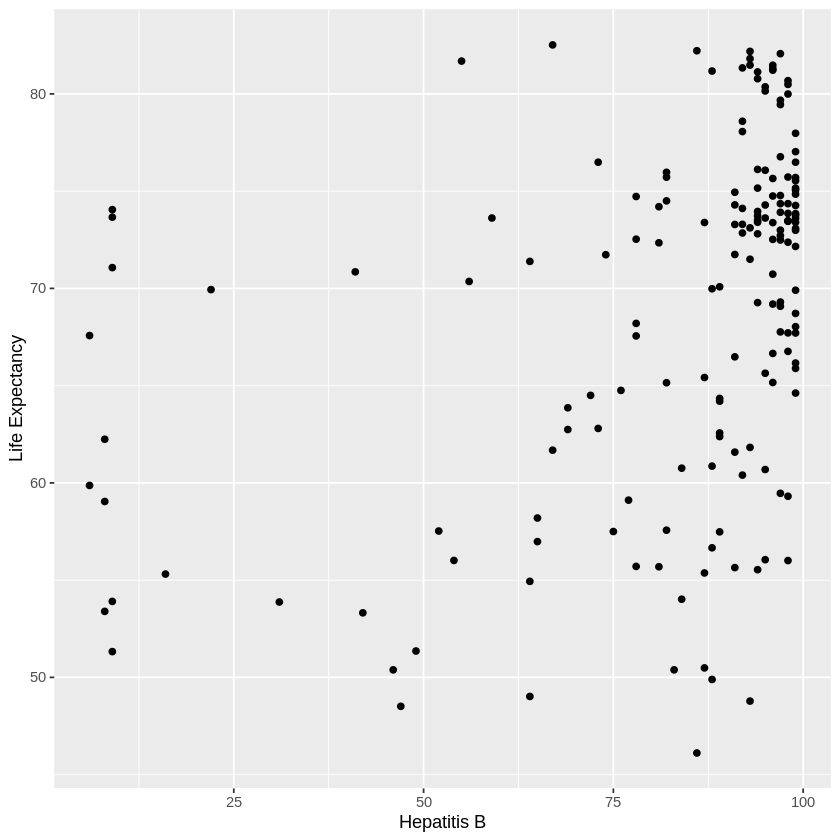

In [166]:
ggplot(le, aes(x=`Hepatitis B`, y=`Life Expectancy`)) + geom_point() + labs(x="Hepatitis B", y="Life Expectancy")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


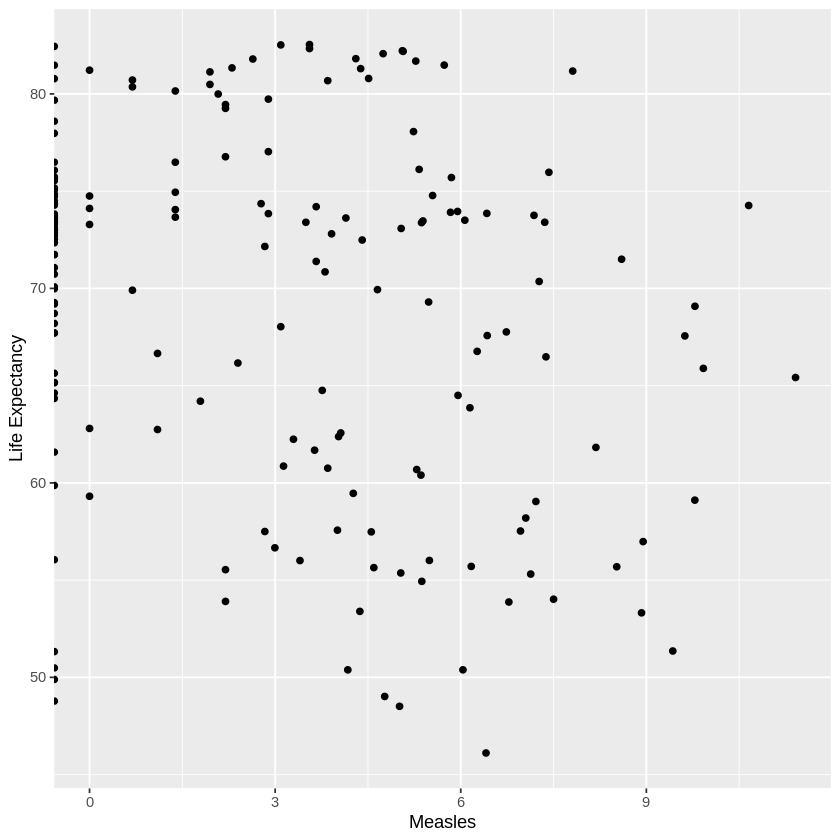

In [167]:
ggplot(le, aes(x=log(Measles), y=`Life Expectancy`)) + geom_point() + labs(x="Measles", y="Life Expectancy")

Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$BMI, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$BMI and le$`Life Expectancy`
S = 403309, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5919004 


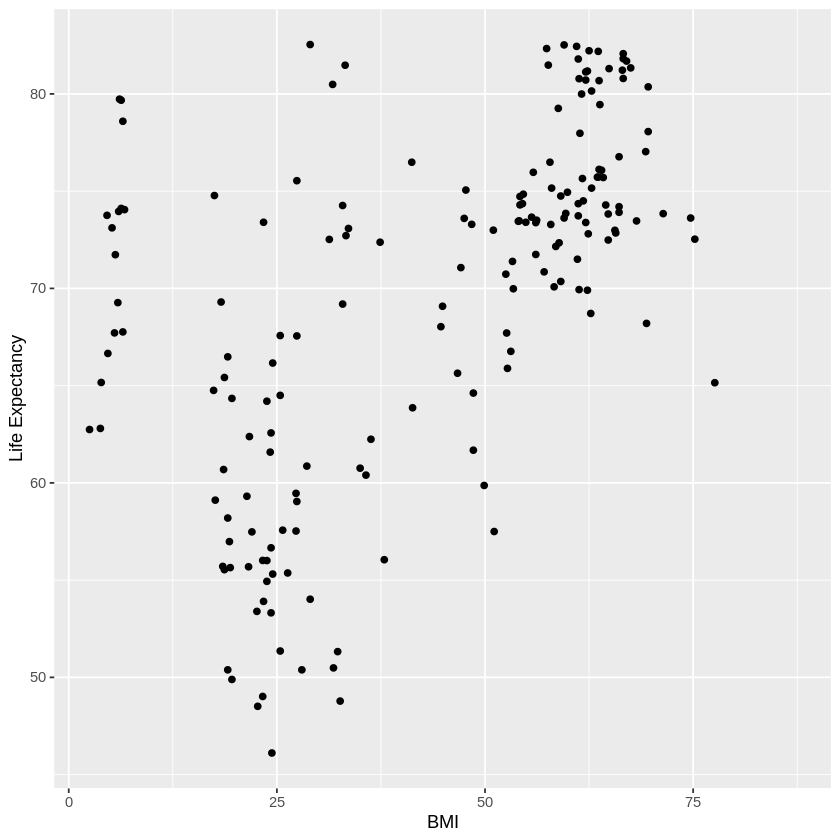

In [168]:
ggplot(le, aes(x=BMI, y=`Life Expectancy`)) + geom_point() + labs(x="BMI", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$BMI, method = "spearman")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`Under-five Deaths`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`Under-five Deaths` and le$`Life Expectancy`
S = 1664742, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.629888 


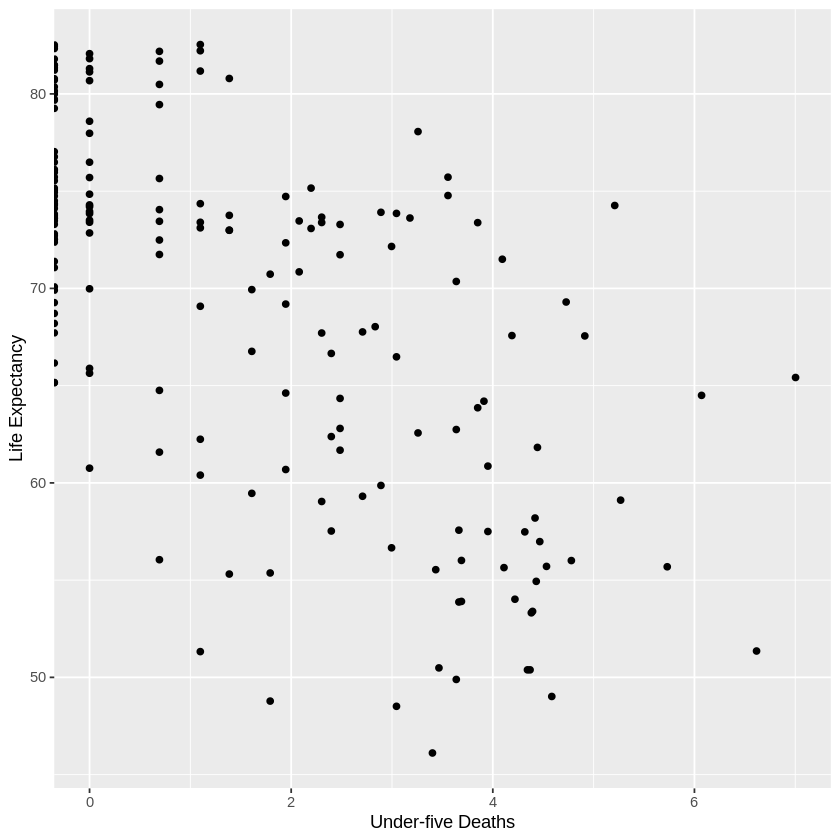

In [169]:
ggplot(le, aes(x=log(`Under-five Deaths`), y=`Life Expectancy`)) + geom_point() + labs(x="Under-five Deaths", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Under-five Deaths`, method = "spearman")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$Polio, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$Polio and le$`Life Expectancy`
S = 497117, p-value = 1.088e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5132912 


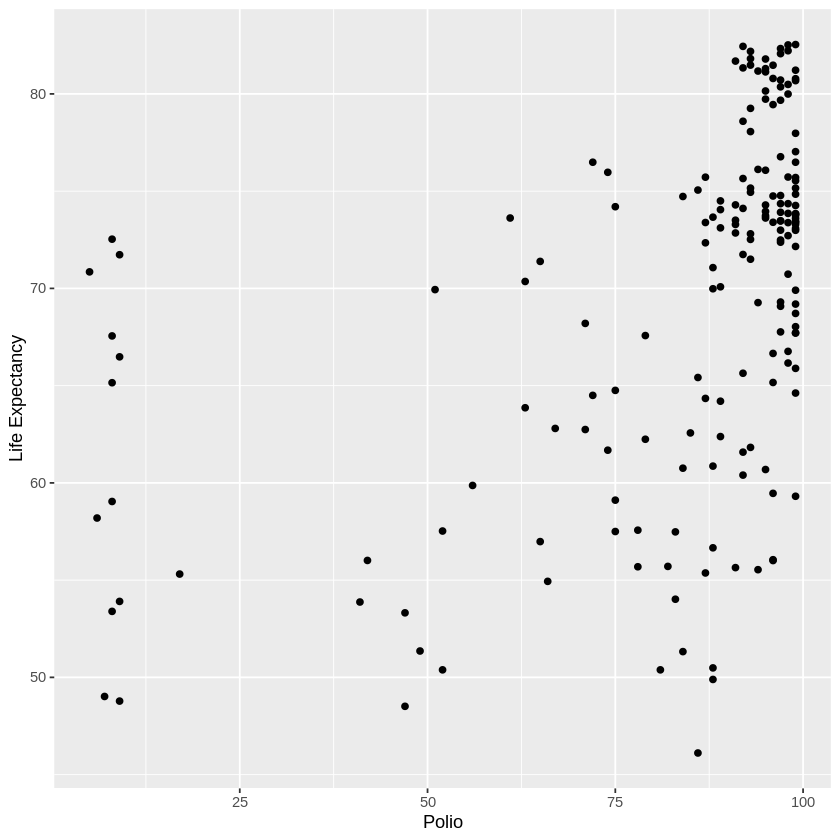

In [170]:
ggplot(le, aes(x=Polio, y=`Life Expectancy`)) + geom_point() + labs(x="Polio", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$Polio, method = "spearman")

Warning message:
“Removed 191 rows containing missing values (`geom_point()`).”


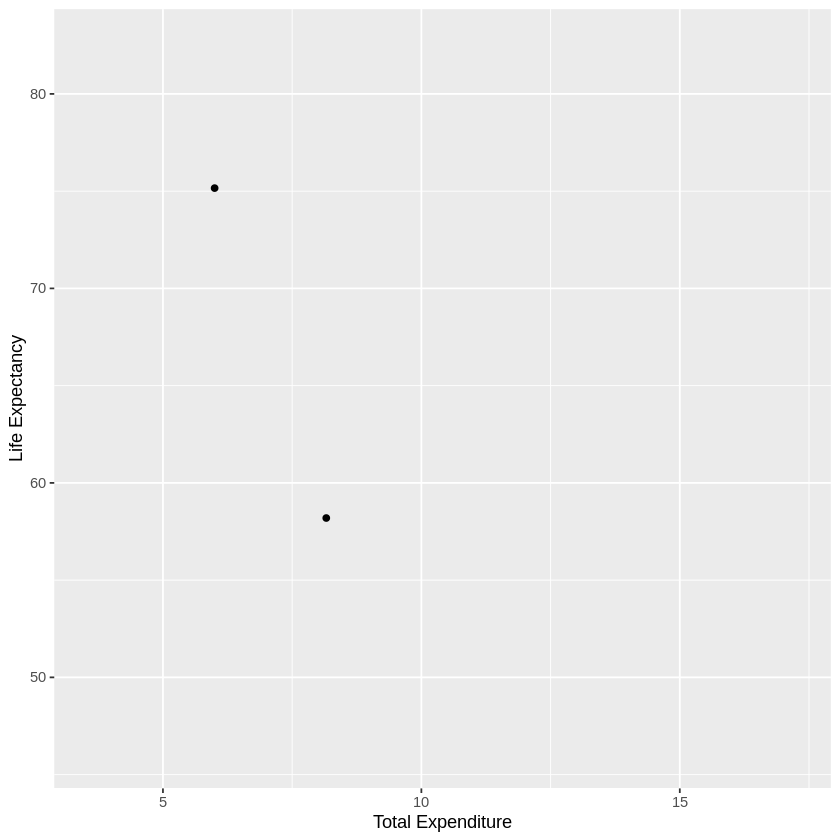

In [171]:
ggplot(le, aes(x=`Total Expenditure`, y=`Life Expectancy`)) + geom_point() + labs(x="Total Expenditure", y="Life Expectancy")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$Diphtheria, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$Diphtheria and le$`Life Expectancy`
S = 497978, p-value = 1.212e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5124482 


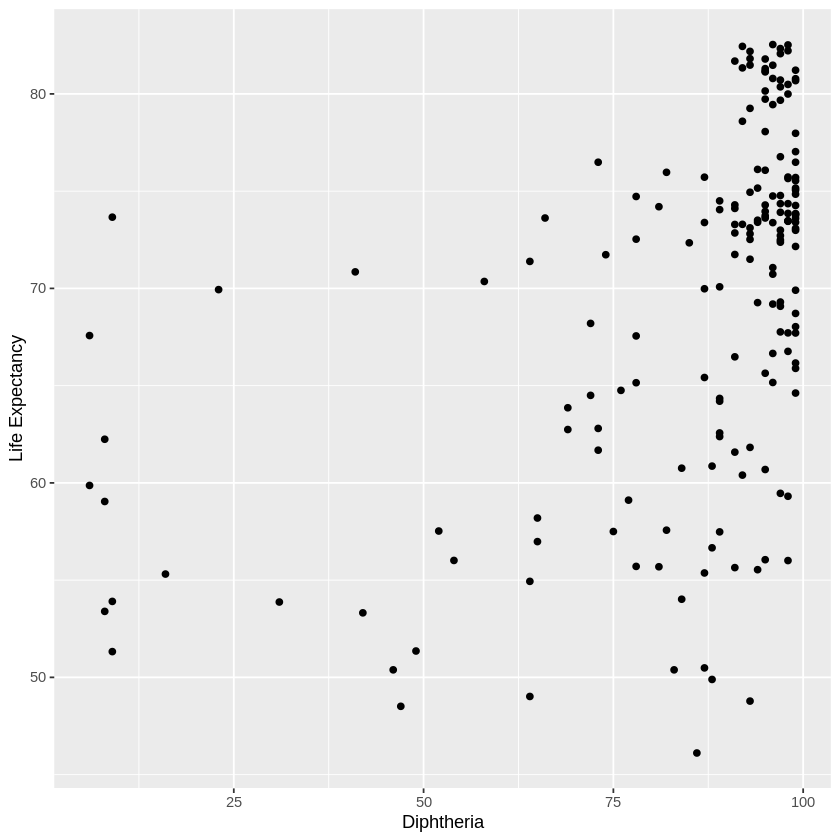

In [172]:
ggplot(le, aes(x=Diphtheria, y=`Life Expectancy`)) + geom_point() + labs(x="Diphtheria", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$Diphtheria, method = "spearman")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`HIV/AIDS`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`HIV/AIDS` and le$`Life Expectancy`
S = 1820882, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.7827594 


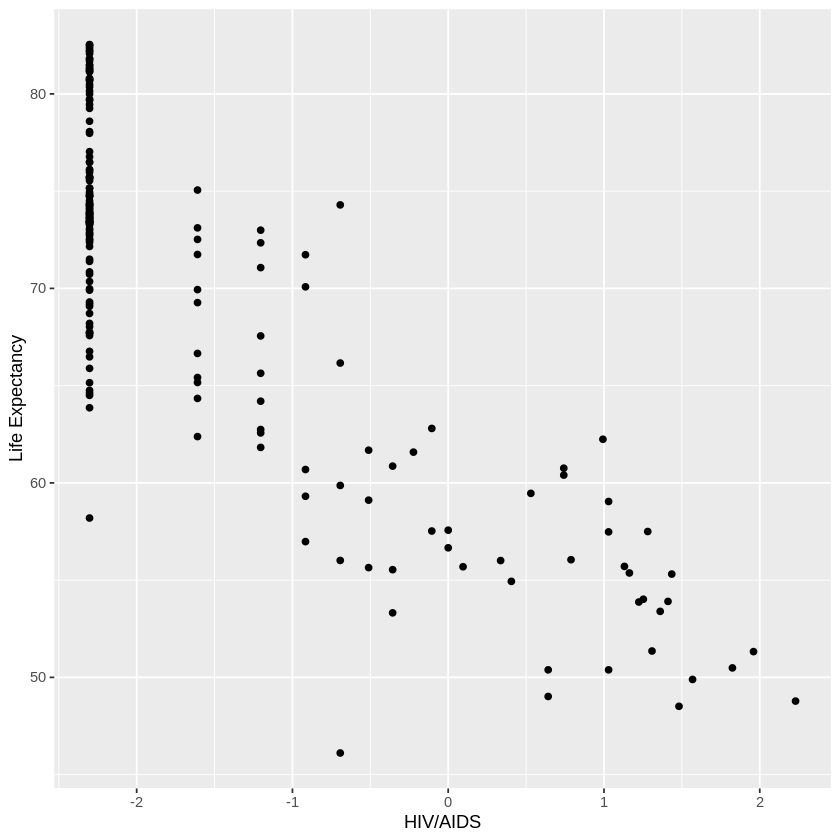

In [173]:
ggplot(le, aes(x=log(`HIV/AIDS`), y=`Life Expectancy`)) + geom_point() + labs(x="HIV/AIDS", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`HIV/AIDS`, method = "spearman")

Warning message:
“Removed 39 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$GDP, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$GDP and le$`Life Expectancy`
S = 255282, p-value = 2.959e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5806015 


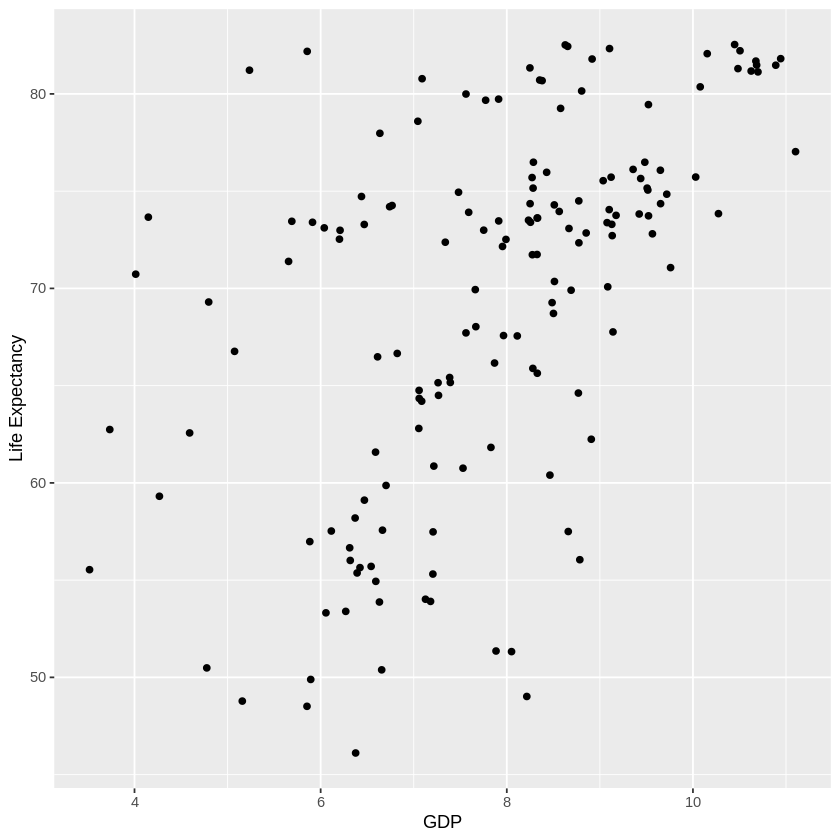

In [174]:
ggplot(le, aes(x=log(GDP), y=`Life Expectancy`)) + geom_point() + labs(x="GDP", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$GDP, method = "spearman")

Warning message:
“Removed 51 rows containing missing values (`geom_point()`).”


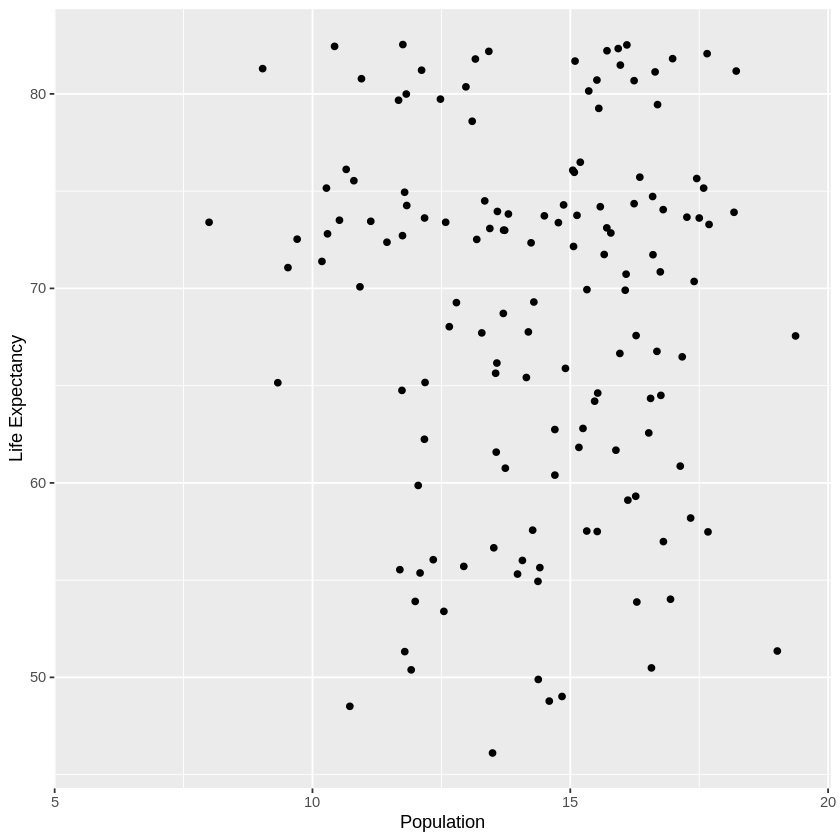

In [175]:
ggplot(le, aes(x=log(Population), y=`Life Expectancy`)) + geom_point() + labs(x="Population", y="Life Expectancy")

Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$ThinnessAyears, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$ThinnessAyears and le$`Life Expectancy`
S = 1620317, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6395658 


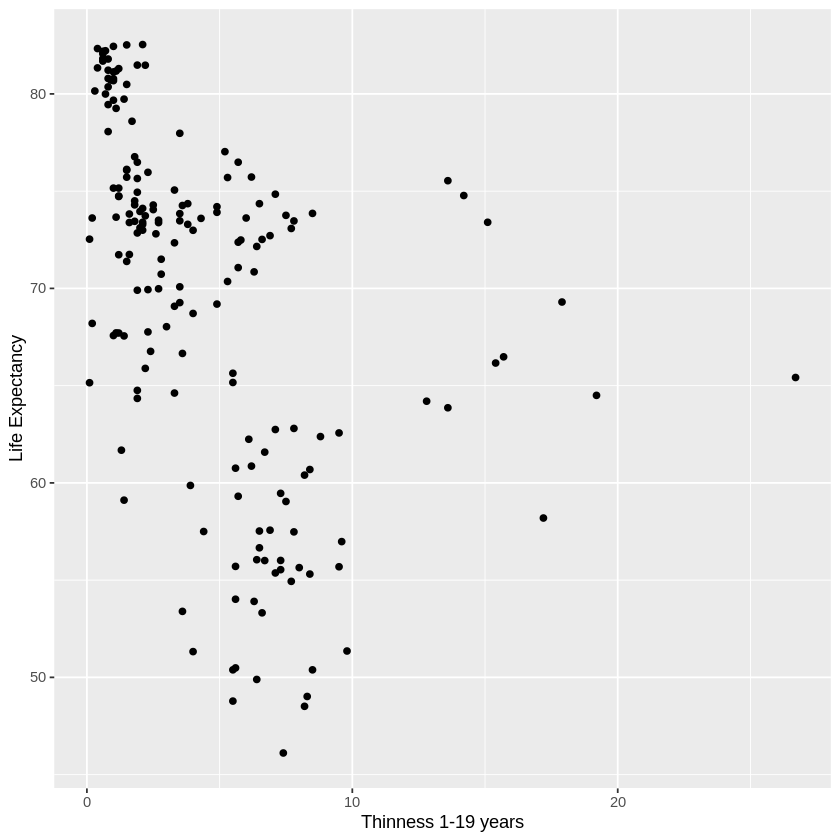

In [176]:
ggplot(le, aes(x=ThinnessAyears, y=`Life Expectancy`)) + geom_point() + labs(x="Thinness 1-19 years", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$ThinnessAyears, method = "spearman")

Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$ThinnessByears, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$ThinnessByears and le$`Life Expectancy`
S = 1636191, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.6556282 


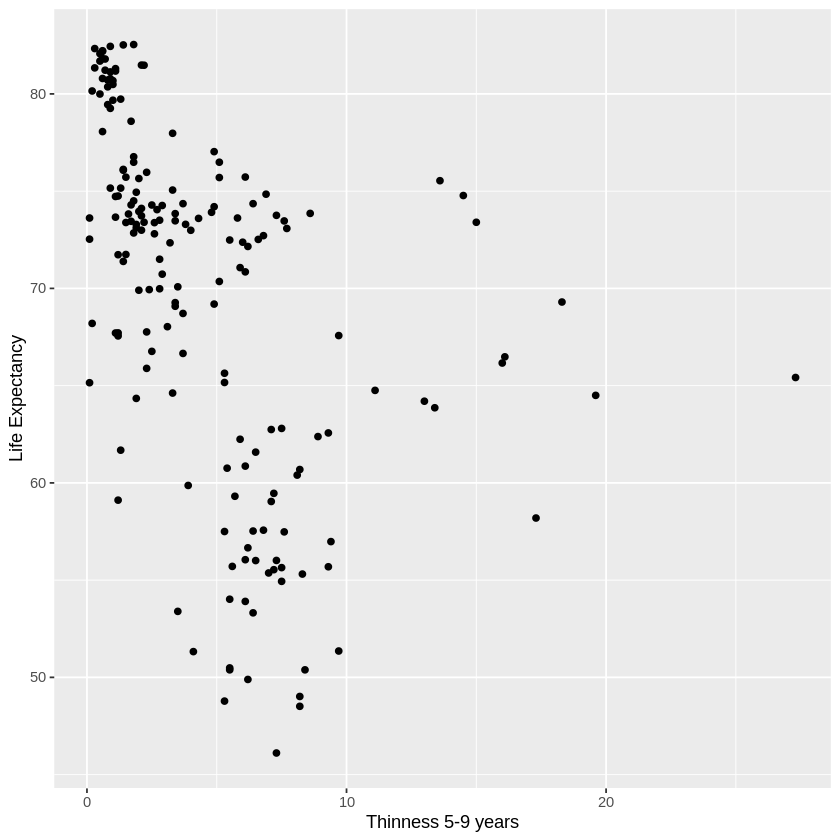

In [177]:
ggplot(le, aes(x=ThinnessByears, y=`Life Expectancy`)) + geom_point() + labs(x="Thinness 5-9 years", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$ThinnessByears, method = "spearman")

Warning message:
“Removed 20 rows containing missing values (`geom_point()`).”
Warning message in cor.test.default(y = le$`Life Expectancy`, x = le$`Income Composition of Resources`, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  le$`Income Composition of Resources` and le$`Life Expectancy`
S = 78421, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9091213 


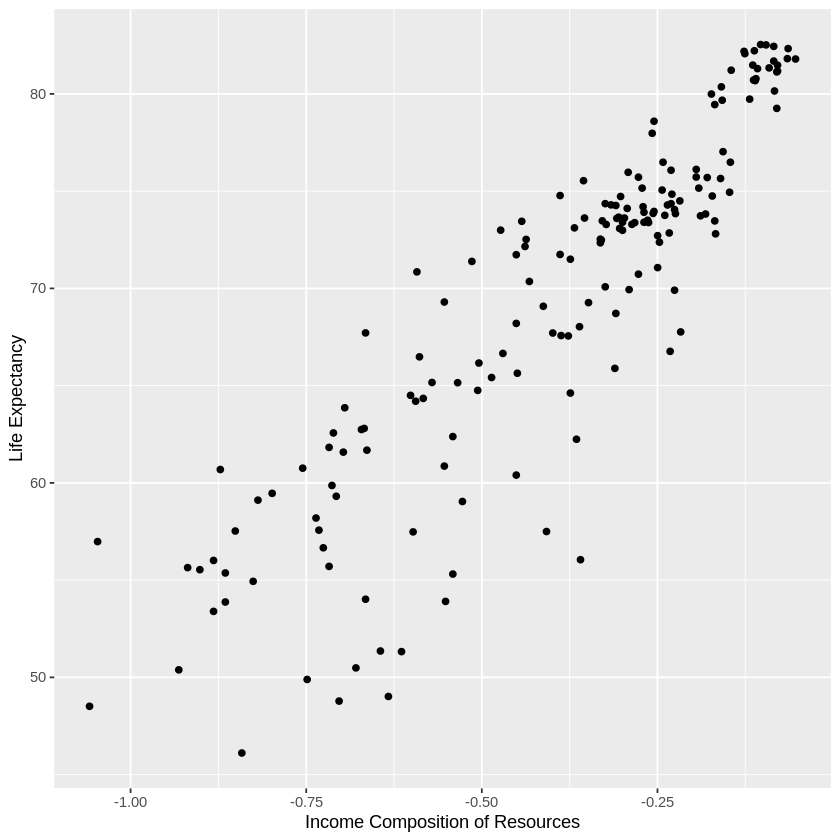

In [178]:
ggplot(le, aes(x=log(`Income Composition of Resources`), y=`Life Expectancy`)) + geom_point() + labs(x="Income Composition of Resources", y="Life Expectancy")
cor.test(y=le$`Life Expectancy`, x=le$`Income Composition of Resources`, method = "spearman")

In [179]:
cor_data <- subset(le, select = c("Adult Mortality",
                                  "Infant Deaths",
                                  "Percentage Expenditure",
                                  "BMI",
                                  "Under-five Deaths",
                                  "Polio",
                                  "Diphtheria",
                                  "HIV/AIDS",
                                  "GDP",
                                  "ThinnessAyears",
                                  "ThinnessByears",
                                  "Income Composition of Resources"))

In [180]:
cor_data <- cor_data[complete.cases(cor_data[1:12]),]

In [181]:
print(colSums(is.na(cor_data)))

                Adult Mortality                   Infant Deaths 
                              0                               0 
         Percentage Expenditure                             BMI 
                              0                               0 
              Under-five Deaths                           Polio 
                              0                               0 
                     Diphtheria                        HIV/AIDS 
                              0                               0 
                            GDP                  ThinnessAyears 
                              0                               0 
                 ThinnessByears Income Composition of Resources 
                              0                               0 


Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(x, y, method = method, use = use):
“Cannot compute exact p-value wit

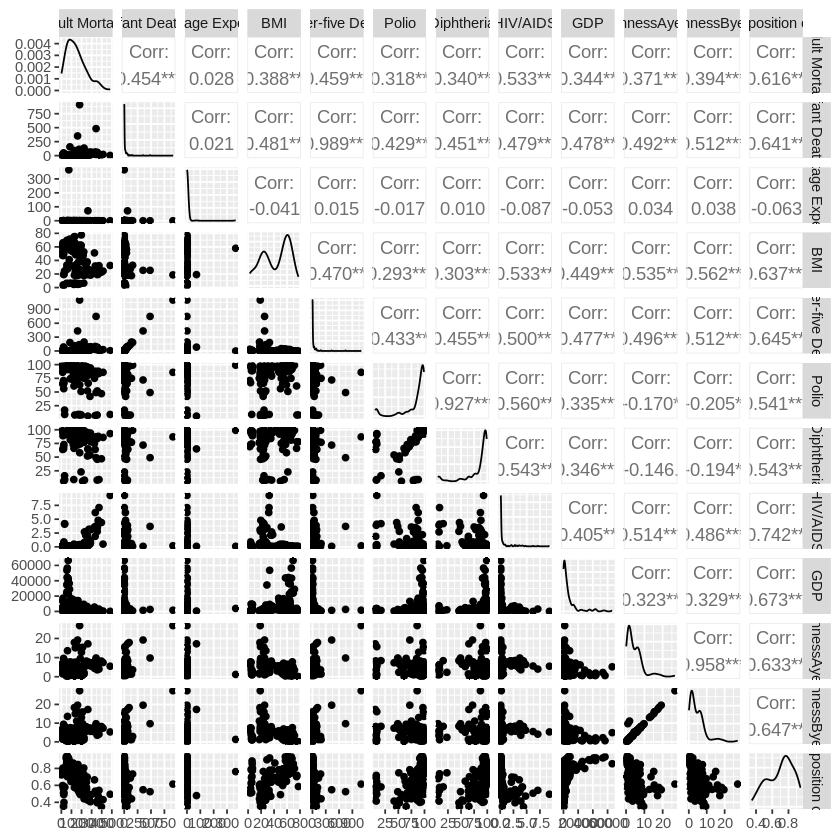

In [182]:
ggpairs(cor_data,
        upper = list(continuous = wrap(ggally_cor, method = "spearman")))

## Regression

In [183]:
model_data <- subset(le, select = c(
                                  "Status",
                                  "Life Expectancy",
                                  "Adult Mortality",
                                  "Infant Deaths",
                                  "Percentage Expenditure",
                                  "BMI",
                                  "Under-five Deaths",
                                  "Polio",
                                  "Diphtheria",
                                  "HIV/AIDS",
                                  "GDP",
                                  "ThinnessAyears",
                                  "ThinnessByears",
                                  "Income Composition of Resources",
                                  "Schooling"))

In [184]:
complete_cases_data <- model_data[complete.cases(model_data[1:15]),]

In [185]:
str(complete_cases_data)

tibble [151 × 15] (S3: tbl_df/tbl/data.frame)
 $ Status                         : Factor w/ 2 levels "Developed","Developing": 2 2 2 2 2 2 2 1 1 2 ...
 $ Life Expectancy                : num [1:151] 58.2 75.2 73.6 49 75.1 ...
 $ Adult Mortality                : num [1:151] 263 74 19 335 13 116 118 59 65 118 ...
 $ Infant Deaths                  : num [1:151] 62 0 21 66 0 8 1 1 0 5 ...
 $ Percentage Expenditure         : num [1:151] 71.3 365 0 0 0 ...
 $ BMI                            : num [1:151] 19.1 58 59.5 23.3 47.7 62.8 54.9 66.6 57.6 52.5 ...
 $ Under-five Deaths              : num [1:151] 83 0 24 98 0 9 1 1 0 6 ...
 $ Polio                          : num [1:151] 6 99 95 7 86 93 96 93 93 98 ...
 $ Diphtheria                     : num [1:151] 65 99 95 64 99 94 94 93 93 96 ...
 $ HIV/AIDS                       : num [1:151] 0.1 0.1 0.1 1.9 0.2 0.1 0.1 0.1 0.1 0.1 ...
 $ GDP                            : num [1:151] 584 3954 4133 3696 13567 ...
 $ ThinnessAyears                 : num

In [186]:
print(colSums(is.na(complete_cases_data)))

                         Status                 Life Expectancy 
                              0                               0 
                Adult Mortality                   Infant Deaths 
                              0                               0 
         Percentage Expenditure                             BMI 
                              0                               0 
              Under-five Deaths                           Polio 
                              0                               0 
                     Diphtheria                        HIV/AIDS 
                              0                               0 
                            GDP                  ThinnessAyears 
                              0                               0 
                 ThinnessByears Income Composition of Resources 
                              0                               0 
                      Schooling 
                              0 


In [187]:
intercept_only <- lm(`Life Expectancy` ~ 1,data = complete_cases_data)

In [188]:
predictors <- lm(`Life Expectancy` ~
  Status+
  `Adult Mortality`+
  `Infant Deaths`+
  `Percentage Expenditure`+
  BMI+
  `Under-five Deaths`+
  Polio+
  Diphtheria+
  `HIV/AIDS`+
  GDP+
  ThinnessAyears+
  ThinnessByears+
  `Income Composition of Resources`+
  Schooling,data=complete_cases_data)

In [189]:
model <- lm(`Life Expectancy` ~
   Status+
  `Adult Mortality`+
  `Infant Deaths`+
  `Percentage Expenditure`+
  BMI+
  `Under-five Deaths`+
  Polio+
  Diphtheria+
  `HIV/AIDS`+
  ThinnessAyears+
  `Income Composition of Resources`+
  Schooling,data=le)

In [190]:
summary(model)


Call:
lm(formula = `Life Expectancy` ~ Status + `Adult Mortality` + 
    `Infant Deaths` + `Percentage Expenditure` + BMI + `Under-five Deaths` + 
    Polio + Diphtheria + `HIV/AIDS` + ThinnessAyears + `Income Composition of Resources` + 
    Schooling, data = le)

Residuals:
   Min     1Q Median     3Q    Max 
-8.915 -1.351  0.101  1.710  8.258 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       47.859397   2.679786  17.859  < 2e-16 ***
StatusDeveloping                  -0.375710   0.741332  -0.507   0.6130    
`Adult Mortality`                 -0.018337   0.003422  -5.358 2.94e-07 ***
`Infant Deaths`                    0.043562   0.024629   1.769   0.0789 .  
`Percentage Expenditure`           0.000789   0.007503   0.105   0.9164    
BMI                                0.012237   0.013248   0.924   0.3571    
`Under-five Deaths`               -0.034759   0.018995  -1.830   0.0692 .  
Polio                      

In [191]:
forward <- step(intercept_only, direction="forward", scope = formula(predictors), trace=0)

In [192]:
backward <- step(predictors, direction = "backward", trace = 0)

In [193]:
forward$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,150,13077.256,675.6638
+ `Income Composition of Resources`,-1,10709.28583,149,2367.970,419.6288
+ `HIV/AIDS`,-1,988.45495,148,1379.515,340.0433
+ `Adult Mortality`,-1,270.58729,147,1108.928,309.0742
+ ThinnessByears,-1,28.45468,146,1080.473,307.1490
+ Diphtheria,-1,27.73320,145,1052.740,305.2226


In [194]:
backward$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,135,1017.138,320.0276
- Schooling,2,2.1477065,137,1019.285,316.3461
- `Percentage Expenditure`,1,0.1574389,138,1019.443,314.3695
- ThinnessByears,1,0.1657838,139,1019.608,312.3940
- GDP,1,0.2683352,140,1019.877,310.4337
- Polio,1,0.3361930,141,1020.213,308.4835
- BMI,1,1.8000109,142,1022.013,306.7497
- Status,1,4.1259460,143,1026.139,305.3581


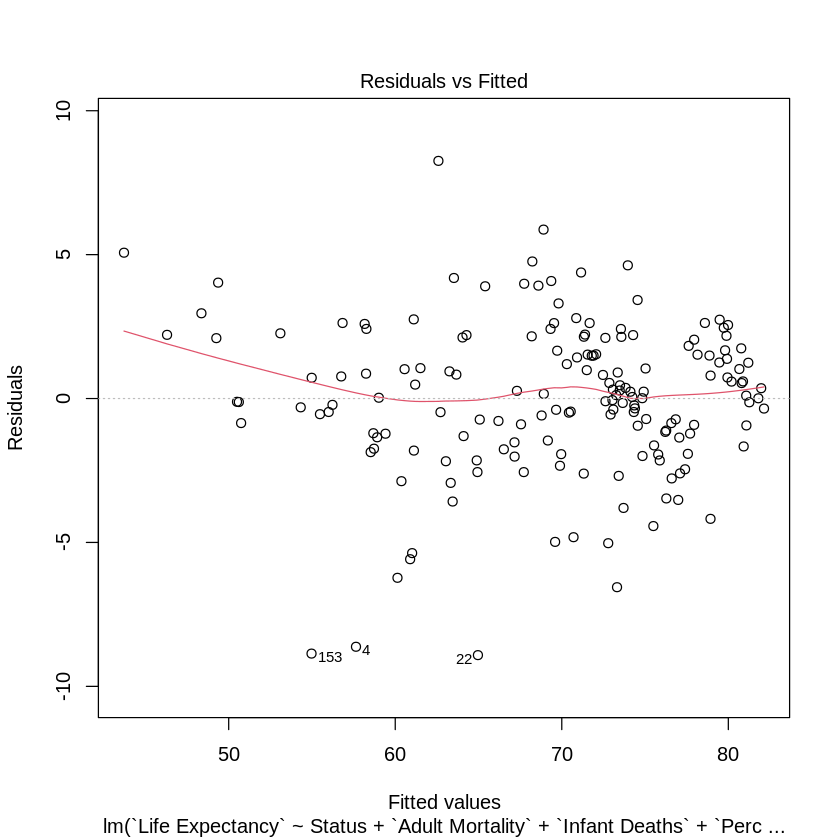

In [195]:
plot(model,1)

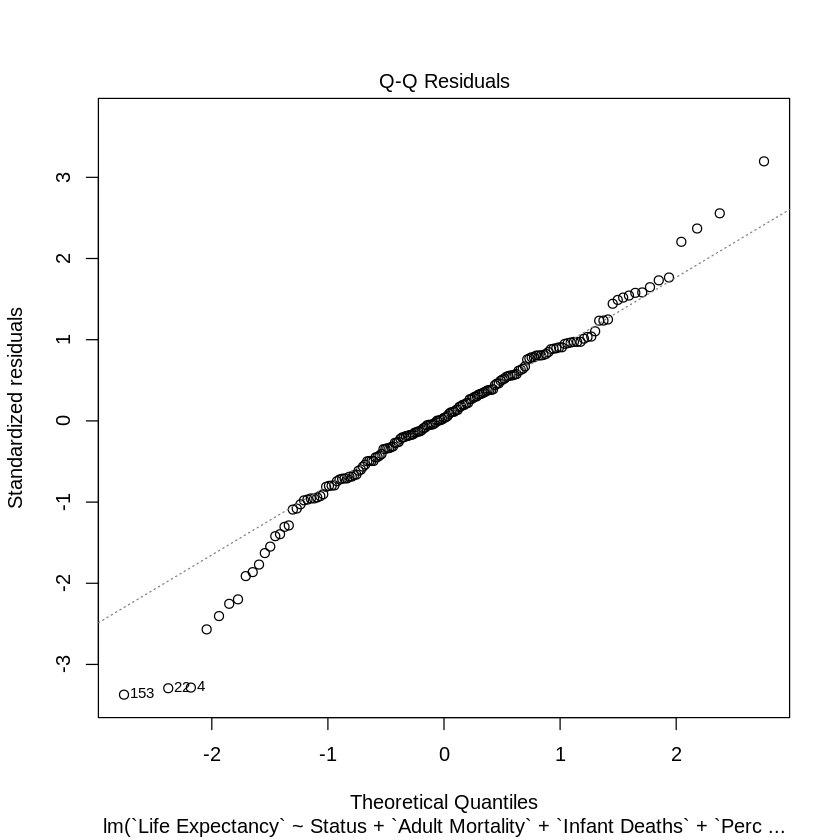

In [196]:
plot(model,2)

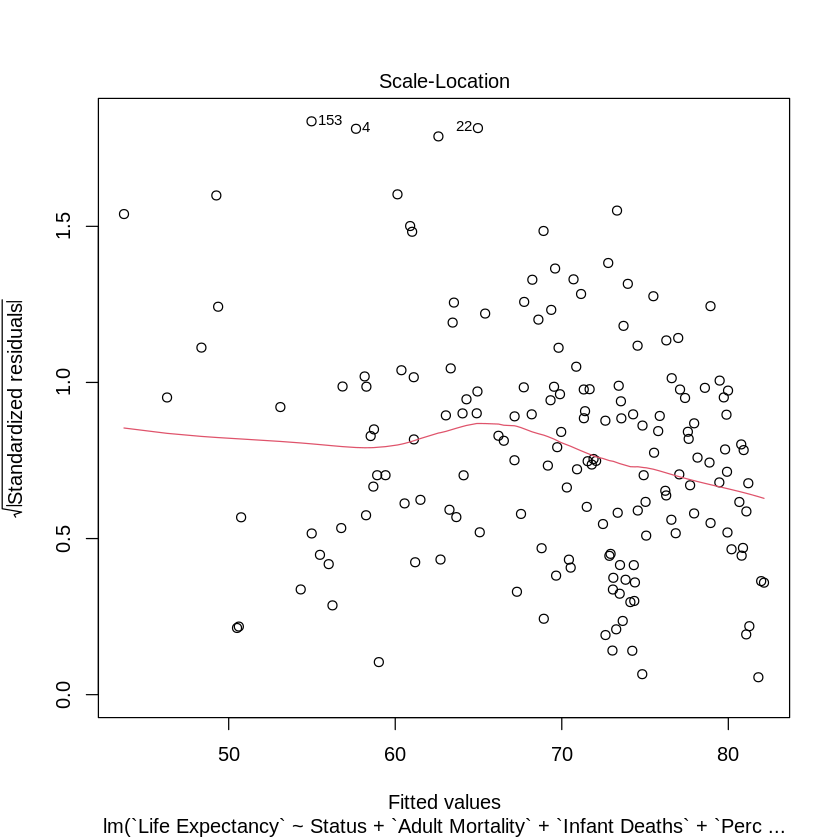

In [197]:
plot(model,3)

In [203]:
dataset <- subset(model_data, select = c(
                                  "Life Expectancy",
                                  "Income Composition of Resources",
                                  "HIV/AIDS",
                                  "Adult Mortality",
                                  "ThinnessByears",
                                  "Diphtheria"))

In [204]:
dataset <- dataset[complete.cases(dataset[1:6]),]

In [205]:
trainIndex <- createDataPartition(dataset$`Life Expectancy`, p=.80, list=FALSE,times = 1)

In [206]:
Train <- dataset[trainIndex,]
Test <- dataset[-trainIndex,]

In [207]:
training_model <- lm(`Life Expectancy` ~
  `Income Composition of Resources`+
  `HIV/AIDS`+
  `Adult Mortality`+
  ThinnessByears+
  Diphtheria,data=Train)

In [208]:
predicted <- predict(training_model, Test)
actual <- Test$`Life Expectancy`

Error.vector <- actual - predicted
AE.vector <- abs(actual - predicted)
MRE.vector <- (abs(actual - predicted))/actual
MER.vector <- (abs(actual - predicted))/predicted

In [209]:
list(ME = mean(Error.vector),
      MdE = median(Error.vector),
      MAE = mean(AE.vector),
      MdAE = median(AE.vector),
      MMRE = mean(MRE.vector),
      MdMRE = median(MRE.vector),
      MMER = mean(MER.vector),
      MdMER = median(MER.vector))

$ME
[1] -0.5209639

$MdE
[1] 0.4721117

$MAE
[1] 2.217171

$MdAE
[1] 1.62391

$MMRE
[1] 0.03487001

$MdMRE
[1] 0.02598218

$MMER
[1] 0.03302393

$MdMER
[1] 0.02532402

In [210]:
table(le$Country)


                                         Afghanistan 
                                                   1 
                                             Albania 
                                                   1 
                                             Algeria 
                                                   1 
                                              Angola 
                                                   1 
                                 Antigua and Barbuda 
                                                   1 
                                           Argentina 
                                                   1 
                                             Armenia 
                                                   1 
                                           Australia 
                                                   1 
                                             Austria 
                                                   1 
                           

In [211]:
dataset2 <-subset(le, select = c(
                    "Country",
                    "Life Expectancy",
                    "Schooling",
                    "Percentage Expenditure",
                    "ThinnessByears",
                    "GDP",
                    "Polio",
                    "BMI",
                    "Status"
                    ))

In [212]:
dataset2 <- dataset2[complete.cases(dataset2[2:9]),]

In [214]:
# Group by "Country" and calculate the mean for each variable
means_by_country <- dataset2 %>%
  group_by(Country) %>%
  summarise(
    Mean_Life_Expectancy = mean(`Life Expectancy`, na.rm = TRUE),
    Mean_Schooling = mean(`Schooling`, na.rm = TRUE),
    Mean_Percentage_Expenditure = mean(`Percentage Expenditure`, na.rm = TRUE),
    Mean_ThinnessByears = mean(`ThinnessByears`, na.rm = TRUE),
    Mean_GDP = mean(`GDP`, na.rm = TRUE),
    Mean_Polio = mean(`Polio`, na.rm = TRUE),
    Mean_BMI = mean(`BMI`, na.rm = TRUE),
    Mean_Status = mean(`Status`, na.rm = TRUE)
  )

# Display the result
print(means_by_country)

Warning message:
“There were 302 warnings in `summarise()`.
The first warning was:
ℹ In argument: `Mean_Schooling = mean(Schooling, na.rm = TRUE)`.
ℹ In group 1: `Country = "Afghanistan"`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 301 remaining warnings.”


# A tibble: 151 × 9
   Country            Mean_Life_Expectancy Mean_Schooling Mean_Percentage_Expe…¹
   <chr>                             <dbl>          <dbl>                  <dbl>
 1 Afghanistan                        58.2             NA                   71.3
 2 Albania                            75.2             NA                  365. 
 3 Algeria                            73.6             NA                    0  
 4 Angola                             49.0             NA                    0  
 5 Antigua and Barbu…                 75.1             NA                    0  
 6 Argentina                          75.2             NA                    0  
 7 Armenia                            73.4             NA                    0  
 8 Australia                          81.8             NA                    0  
 9 Austria                            81.5             NA                    0  
10 Azerbaijan                         70.7             NA                    0  
# ℹ 141 

In [215]:
head(means_by_country)

Country,Mean_Life_Expectancy,Mean_Schooling,Mean_Percentage_Expenditure,Mean_ThinnessByears,Mean_GDP,Mean_Polio,Mean_BMI,Mean_Status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,58.19375,NA,71.27962,17.3,584.2592,6,19.1,NA
Albania,75.15625,NA,364.97523,1.3,3954.2278,99,58.0,NA
Algeria,73.61875,NA,0.00000,5.8,4132.7629,95,59.5,NA
Angola,49.01875,NA,0.00000,8.2,3695.7937,7,23.3,NA
Antigua and Barbuda,75.05625,NA,0.00000,3.3,13566.9541,86,47.7,NA
Argentina,75.15625,NA,0.00000,0.9,13467.1236,93,62.8,NA


In [216]:
trainIndex <- createDataPartition(dataset2$`Life Expectancy`, p=.70, list=FALSE,times = 1)

In [218]:
Train <- dataset[trainIndex,]
Test <- dataset[-trainIndex,]

In [225]:
training_model <- lm(`Life Expectancy` ~
  `Income Composition of Resources`+
  `HIV/AIDS`+
  `Adult Mortality`,data=Train)

In [226]:
summary(training_model)


Call:
lm(formula = `Life Expectancy` ~ `Income Composition of Resources` + 
    `HIV/AIDS` + `Adult Mortality`, data = Train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4249 -1.5006  0.1696  2.1213  5.7032 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       45.89161    2.10873  21.763  < 2e-16 ***
`Income Composition of Resources` 39.88962    2.39630  16.646  < 2e-16 ***
`HIV/AIDS`                        -1.33978    0.25853  -5.182 1.10e-06 ***
`Adult Mortality`                 -0.02075    0.00455  -4.561 1.41e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.901 on 103 degrees of freedom
Multiple R-squared:  0.9084,	Adjusted R-squared:  0.9057 
F-statistic: 340.4 on 3 and 103 DF,  p-value: < 2.2e-16


In [228]:
predicted <- predict(training_model, Test)
actual <- Test$`Life Expectancy`

Error.vector <- actual - predicted
AE.vector <- abs(actual - predicted)
MRE.vector <- (abs(actual - predicted))/actual
MER.vector <- (abs(actual - predicted))/predicted

In [229]:
list(ME = mean(Error.vector),
      MdE = median(Error.vector),
      MAE = mean(AE.vector),
      MdAE = median(AE.vector),
      MMRE = mean(MRE.vector),
      MdMRE = median(MRE.vector),
      MMER = mean(MER.vector),
      MdMER = median(MER.vector))

$ME
[1] -0.3370365

$MdE
[1] -0.2153092

$MAE
[1] 1.810401

$MdAE
[1] 1.311559

$MMRE
[1] 0.02674209

$MdMRE
[1] 0.01881336

$MMER
[1] 0.02638363

$MdMER
[1] 0.01904252